## Project: Open Food database

## A. An overview of the dataset

##### __1.Importing data__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from pandas import Series, DataFrame
import warnings
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

In [2]:
ofr_data = pd.read_pickle('data_385k.pkl', compression='zip')

##### __2.Number of rows and columns__

In [3]:
print("Number of rows and columns")
print('Rows: {}'.format(ofr_data.shape[0]) + ' \nColumns: {}'.format(ofr_data.shape[1]))

Number of rows and columns
Rows: 385384 
Columns: 99


##### __3.Entries from the DataFrame__

In [4]:
ofr_data.head()

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,copper_cu_unit,country,created_at,energy_kcal_per_hundred,energy_kcal_per_portion,energy_kcal_unit,energy_per_hundred,energy_per_portion,energy_unit,fat_per_hundred,fat_per_portion,fat_unit,fatty_acids_total_saturated_per_hundred,fatty_acids_total_saturated_unit,fatty_acids_total_trans_per_hundred,fatty_acids_total_trans_unit,fiber_insoluble_per_hundred,fiber_insoluble_unit,fiber_per_hundred,fiber_per_portion,fiber_soluble_per_hundred,fiber_soluble_unit,fiber_unit,folate_total_per_hundred,folate_total_unit,folic_acid_per_hundred,folic_acid_unit,hundred_unit,id,ingredients_en,iron_per_hundred,iron_unit,magnesium_per_hundred,magnesium_unit,manganese_mn_per_hundred,manganese_mn_unit,monounsaturated_fatty_acids_per_hundred,monounsaturated_fatty_acids_unit,phosphorus_per_hundred,phosphorus_unit,polyunsaturated_fatty_acids_per_hundred,polyunsaturated_fatty_acids_unit,portion_quantity,portion_unit,potassium_k_per_hundred,potassium_k_unit,product_name_de,product_name_en,product_name_fr,protein_per_hundred,protein_per_portion,protein_unit,quantity,salt_per_hundred,salt_per_portion,salt_unit,saturated_fat_per_hundred,saturated_fat_per_portion,saturated_fat_unit,sodium_per_hundred,sodium_per_portion,sodium_unit,sugars_added_per_hundred,sugars_added_unit,sugars_per_hundred,sugars_per_portion,sugars_unit,unit,updated_at,vitamin_a_iu_per_hundred,vitamin_a_iu_unit,vitamin_b12_cobalamin_per_hundred,vitamin_b12_cobalamin_unit,vitamin_b1_thiamin_per_hundred,vitamin_b1_thiamin_unit,vitamin_b2_riboflavin_per_hundred,vitamin_b2_riboflavin_unit,vitamin_b3_niacin_per_hundred,vitamin_b3_niacin_unit,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
0,0.0,8001772000030,NaN,NaN,75.00,37.50,g,NaN,NaN,NaN,NaN,CH,2016-06-01T11:42:22.908Z,359.0,179.0,kCal,1500.0,150.0,kJ,0.42,0.21,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g,1000,Superior quality durum wheat Pasta\r\n\r\nIngr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,g,NaN,NaN,Bio Spaghetti,Bio Spaghetti,Spaghetti Bio,11.00,5.50,g,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g,2019-10-30T13:46:32.651Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,7610809001066,NaN,NaN,1.50,1.13,g,NaN,NaN,NaN,NaN,CH,2016-06-01T11:42:25.111Z,242.0,181.0,kCal,1010.0,758.0,kJ,18.00,13.50,g,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,g,NaN,NaN,NaN,NaN,g,1001,"Bio Milk (Switzerland), kitchen salt",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,g,NaN,NaN,Naturaplan Mozzarella,Naturaplan Mozzarella,Naturaplan Mozzarella,19.00,14.25,g,150.0,0.50,0.38,g,11.00,8.25,g,NaN,NaN,NaN,NaN,NaN,1.50,1.13,g,g,2019-10-30T13:47:12.174Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,8002530159021,NaN,NaN,52.68,NaN,g,NaN,NaN,NaN,NaN,CH,2016-06-01T11:42:25.900Z,325.0,NaN,kCal,1358.3,NaN,kJ,12.08,NaN,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g,1002,100% coffee Arabica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,g,NaN,NaN,Caffè Mauro - Bio Kaffe,Caffè Mauro - Roasted organic coffee blend,Caffè Mauro - café bio,19.05,NaN,g,1000.0,0.25,NaN,g,3.03,NaN,g,NaN,NaN,NaN,NaN,NaN,0.25,NaN,g,g,2019-10-30T13:48:12.635Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,3033715065788,NaN,NaN,70.40,11.97,g,NaN,NaN,NaN,NaN,CH,2016-06-01T11:42:26.184Z,402.0,68.0,kCal,1679.0,285.0,kJ,7.90,1.34,g,NaN,NaN,NaN,NaN,NaN,NaN,9.1,1.55,NaN,NaN,g,NaN,NaN,NaN,NaN,g,1003,"Powdered chocolate 99% (sugar, cocoa), emulsif...",NaN,NaN,NaN,Na

##### __4.1.Check the data type for each column__

In [5]:
ofr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385384 entries, 0 to 385383
Data columns (total 99 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   alcohol_by_volume                                385384 non-null  float64
 1   barcode                                          385384 non-null  object 
 2   calcium_per_hundred                              264979 non-null  float64
 3   calcium_unit                                     265086 non-null  object 
 4   carbohydrates_per_hundred                        351551 non-null  float64
 5   carbohydrates_per_portion                        11480 non-null   float64
 6   carbohydrates_unit                               351828 non-null  object 
 7   cholesterol_per_hundred                          270282 non-null  float64
 8   cholesterol_unit                                 270329 non-null  object 
 9   copper_cu_per_h

##### __4.2.Creating separate lists to hold the names of columns of the same data type__

In [6]:
pd.value_counts(ofr_data.dtypes)

float64    50
object     48
int64       1
dtype: int64

In [7]:
list_object = ofr_data.select_dtypes(include=['object']).columns.to_list()
print (list_object)

['barcode', 'calcium_unit', 'carbohydrates_unit', 'cholesterol_unit', 'copper_cu_unit', 'country', 'created_at', 'energy_kcal_unit', 'energy_unit', 'fat_unit', 'fatty_acids_total_saturated_unit', 'fatty_acids_total_trans_unit', 'fiber_insoluble_unit', 'fiber_soluble_unit', 'fiber_unit', 'folate_total_unit', 'folic_acid_unit', 'hundred_unit', 'ingredients_en', 'iron_unit', 'magnesium_unit', 'manganese_mn_unit', 'monounsaturated_fatty_acids_unit', 'phosphorus_unit', 'polyunsaturated_fatty_acids_unit', 'portion_unit', 'potassium_k_unit', 'product_name_de', 'product_name_en', 'product_name_fr', 'protein_unit', 'salt_unit', 'saturated_fat_unit', 'sodium_unit', 'sugars_added_unit', 'sugars_unit', 'unit', 'updated_at', 'vitamin_a_iu_unit', 'vitamin_b12_cobalamin_unit', 'vitamin_b1_thiamin_unit', 'vitamin_b2_riboflavin_unit', 'vitamin_b3_niacin_unit', 'vitamin_b5_panthothenic_acid_unit', 'vitamin_b6_pyridoxin_unit', 'vitamin_c_ascorbic_acid_unit', 'vitamin_d_d2_d3_international_units_unit', 'z

In [8]:
list_float = ofr_data.select_dtypes(include=['float64']).columns.to_list()
print (list_float)

['alcohol_by_volume', 'calcium_per_hundred', 'carbohydrates_per_hundred', 'carbohydrates_per_portion', 'cholesterol_per_hundred', 'copper_cu_per_hundred', 'energy_kcal_per_hundred', 'energy_kcal_per_portion', 'energy_per_hundred', 'energy_per_portion', 'fat_per_hundred', 'fat_per_portion', 'fatty_acids_total_saturated_per_hundred', 'fatty_acids_total_trans_per_hundred', 'fiber_insoluble_per_hundred', 'fiber_per_hundred', 'fiber_per_portion', 'fiber_soluble_per_hundred', 'folate_total_per_hundred', 'folic_acid_per_hundred', 'iron_per_hundred', 'magnesium_per_hundred', 'manganese_mn_per_hundred', 'monounsaturated_fatty_acids_per_hundred', 'phosphorus_per_hundred', 'polyunsaturated_fatty_acids_per_hundred', 'portion_quantity', 'potassium_k_per_hundred', 'protein_per_hundred', 'protein_per_portion', 'quantity', 'salt_per_hundred', 'salt_per_portion', 'saturated_fat_per_hundred', 'saturated_fat_per_portion', 'sodium_per_hundred', 'sodium_per_portion', 'sugars_added_per_hundred', 'sugars_per

In [9]:
list_int = ofr_data.select_dtypes(include=['int64']).columns.to_list()
print (list_int)

['id']


## B. Preliminary Exploratory Data Analysis

##### __1.Duplicated products in the data__

In [10]:
ofr_data.duplicated().sum()

10500

In [11]:
ofr_data.loc[ofr_data.duplicated(), :]

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,copper_cu_unit,country,created_at,energy_kcal_per_hundred,energy_kcal_per_portion,energy_kcal_unit,energy_per_hundred,energy_per_portion,energy_unit,fat_per_hundred,fat_per_portion,fat_unit,fatty_acids_total_saturated_per_hundred,fatty_acids_total_saturated_unit,fatty_acids_total_trans_per_hundred,fatty_acids_total_trans_unit,fiber_insoluble_per_hundred,fiber_insoluble_unit,fiber_per_hundred,fiber_per_portion,fiber_soluble_per_hundred,fiber_soluble_unit,fiber_unit,folate_total_per_hundred,folate_total_unit,folic_acid_per_hundred,folic_acid_unit,hundred_unit,id,ingredients_en,iron_per_hundred,iron_unit,magnesium_per_hundred,magnesium_unit,manganese_mn_per_hundred,manganese_mn_unit,monounsaturated_fatty_acids_per_hundred,monounsaturated_fatty_acids_unit,phosphorus_per_hundred,phosphorus_unit,polyunsaturated_fatty_acids_per_hundred,polyunsaturated_fatty_acids_unit,portion_quantity,portion_unit,potassium_k_per_hundred,potassium_k_unit,product_name_de,product_name_en,product_name_fr,protein_per_hundred,protein_per_portion,protein_unit,quantity,salt_per_hundred,salt_per_portion,salt_unit,saturated_fat_per_hundred,saturated_fat_per_portion,saturated_fat_unit,sodium_per_hundred,sodium_per_portion,sodium_unit,sugars_added_per_hundred,sugars_added_unit,sugars_per_hundred,sugars_per_portion,sugars_unit,unit,updated_at,vitamin_a_iu_per_hundred,vitamin_a_iu_unit,vitamin_b12_cobalamin_per_hundred,vitamin_b12_cobalamin_unit,vitamin_b1_thiamin_per_hundred,vitamin_b1_thiamin_unit,vitamin_b2_riboflavin_per_hundred,vitamin_b2_riboflavin_unit,vitamin_b3_niacin_per_hundred,vitamin_b3_niacin_unit,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
374884,0.0,7613404363317,NaN,NaN,17.0,60.00,g,NaN,NaN,NaN,NaN,CH,2021-09-28T08:11:59.797Z,165.0,NaN,NaN,692.0,2426.0,kJ,6.60,23.00,g,NaN,NaN,NaN,NaN,NaN,NaN,1.6,5.6,NaN,NaN,g,NaN,NaN,NaN,NaN,g,376858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350.0,g,NaN,NaN,NaN,NaN,NaN,8.60,30.00,g,350.0,1.20,4.20,g,5.3,19.0,g,NaN,NaN,NaN,NaN,NaN,1.0,3.5,g,g,2021-09-28T08:16:18.108Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374885,0.0,7613269343509,NaN,NaN,1.0,1.80,g,NaN,NaN,NaN,NaN,CH,2021-09-28T08:16:22.906Z,13.0,NaN,NaN,54.0,65.0,kJ,0.50,0.50,g,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,g,NaN,NaN,NaN,NaN,g,376859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,g,NaN,NaN,NaN,NaN,Migros - Petites feuilles bio,1.00,1.80,g,200.0,0.05,0.06,g,0.0,0.0,g,NaN,NaN,NaN,NaN,NaN,1.0,1.8,g,g,2021-09-28T08:20:09.511Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374886,0.0,2110012004502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CH,2021-09-28T08:20:18.546Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g,376860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,g,NaN,NaN,Emmentaler (Mild),NaN,Emmentaler (Doux),NaN,NaN,NaN,281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g,2021-09-28T08:21:21.476Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374887,0.0,2159171001007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CH,2021-09-28T08:21:26.832Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g,376861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,g,NaN,NaN,NaN,NaN,Migros - Pommes Gradirose,NaN,NaN,NaN,230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g,2021-09-28T08:21:55.865Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [12]:
ofr_data.drop_duplicates(inplace=True)
ofr_data.drop_duplicates(["barcode"], inplace=True)
ofr_data.drop_duplicates(["id"],inplace=True)
print("Number of rows and columns after removing duplicates")
print('Rows: {}'.format(ofr_data.shape[0]) + ' \nColumns: {}'.format(ofr_data.shape[1]))

Number of rows and columns after removing duplicates
Rows: 374446 
Columns: 99


##### __2.Proportion of missing values in the data__

In [13]:
ofr_data.isnull().sum().sum()

22372156

In [14]:
ofr_data.isnull().sum().sort_values()

alcohol_by_volume                                       0
portion_unit                                            0
portion_quantity                                        0
unit                                                    0
id                                                      0
hundred_unit                                            0
updated_at                                              0
created_at                                              0
country                                                 0
quantity                                                0
barcode                                                 0
protein_unit                                        23846
protein_per_hundred                                 24160
carbohydrates_unit                                  25824
carbohydrates_per_hundred                           26096
fat_unit                                            29059
fat_per_hundred                                     29387
product_name_e

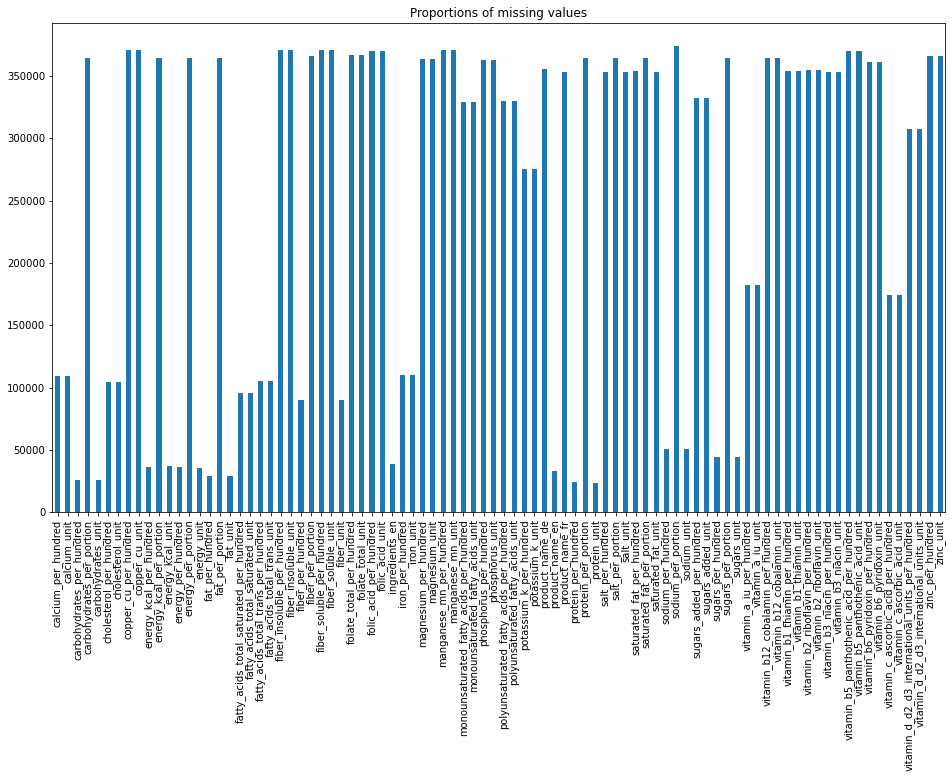

In [15]:
ofr_data.isna().sum()[ofr_data.isna().sum()>0].plot(kind='bar', figsize=(16, 9))
plt.title('Proportions of missing values')
plt.show()

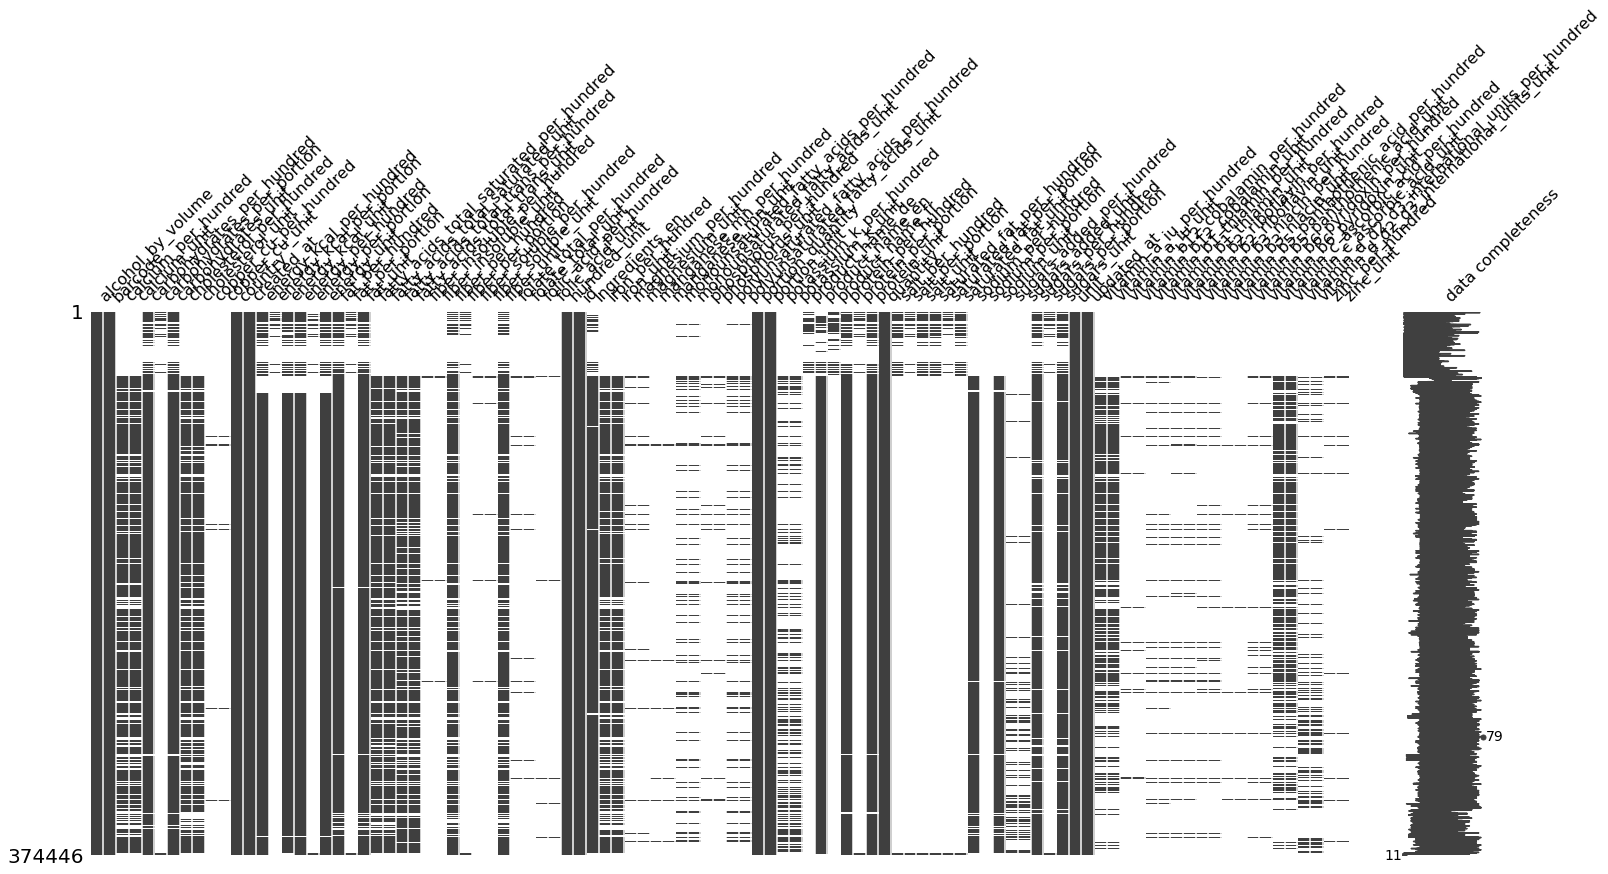

In [16]:
msno.matrix(ofr_data, labels=True)
plt.show()

##### __3.Addressing missing values__

Considering we have product names in three different languages, we'll create a new column that will primarily have English product names, then fill in the missing product name values with English names with German, then repeat the same with French product names.

First, we will put product names (product_name_en, product_name_fr, product_name_de) under "product_name"

Let's check how many missing values are in each product_name column for different langugages

In [17]:
ofr_data[["product_name_en","product_name_fr","product_name_de"]].isnull().sum()

product_name_en     32908
product_name_fr    352787
product_name_de    355328
dtype: int64

Now, we wil make new column called 'product_name' and fill it with eng names of products

In [18]:
ofr_data['product_name'] = ofr_data['product_name_de'].fillna(ofr_data['product_name_en'])

After we filled missing names with english or german names we will again check missing values.

In [19]:
ofr_data[["product_name_en","product_name_fr","product_name_de", "product_name"]].isnull().sum()

product_name_en     32908
product_name_fr    352787
product_name_de    355328
product_name        23450
dtype: int64

And now we will fill missing values with french names of products

In [20]:
ofr_data['product_name'] = ofr_data['product_name_fr'].fillna(ofr_data['product_name_en'])

Again we will check missing values of 'product_names'

In [21]:
ofr_data[["product_name_en","product_name_fr","product_name_de", "product_name"]].isnull().sum()

product_name_en     32908
product_name_fr    352787
product_name_de    355328
product_name        21303
dtype: int64

Now we will drop columns with product names on different languages because we made new universal one called 'product_name'

In [22]:
ofr_data.drop(["product_name_fr", "product_name_en", "product_name_de"], axis=1, inplace=True)

In [23]:
ofr_data.shape

(374446, 97)

Then we will clear the "product_name" column

In [24]:
ofr_data[ofr_data['product_name'].isnull()]

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,copper_cu_unit,country,created_at,energy_kcal_per_hundred,energy_kcal_per_portion,energy_kcal_unit,energy_per_hundred,energy_per_portion,energy_unit,fat_per_hundred,fat_per_portion,fat_unit,fatty_acids_total_saturated_per_hundred,fatty_acids_total_saturated_unit,fatty_acids_total_trans_per_hundred,fatty_acids_total_trans_unit,fiber_insoluble_per_hundred,fiber_insoluble_unit,fiber_per_hundred,fiber_per_portion,fiber_soluble_per_hundred,fiber_soluble_unit,fiber_unit,folate_total_per_hundred,folate_total_unit,folic_acid_per_hundred,folic_acid_unit,hundred_unit,id,ingredients_en,iron_per_hundred,iron_unit,magnesium_per_hundred,magnesium_unit,manganese_mn_per_hundred,manganese_mn_unit,monounsaturated_fatty_acids_per_hundred,monounsaturated_fatty_acids_unit,phosphorus_per_hundred,phosphorus_unit,polyunsaturated_fatty_acids_per_hundred,polyunsaturated_fatty_acids_unit,portion_quantity,portion_unit,potassium_k_per_hundred,potassium_k_unit,protein_per_hundred,protein_per_portion,protein_unit,quantity,salt_per_hundred,salt_per_portion,salt_unit,saturated_fat_per_hundred,saturated_fat_per_portion,saturated_fat_unit,sodium_per_hundred,sodium_per_portion,sodium_unit,sugars_added_per_hundred,sugars_added_unit,sugars_per_hundred,sugars_per_portion,sugars_unit,unit,updated_at,vitamin_a_iu_per_hundred,vitamin_a_iu_unit,vitamin_b12_cobalamin_per_hundred,vitamin_b12_cobalamin_unit,vitamin_b1_thiamin_per_hundred,vitamin_b1_thiamin_unit,vitamin_b2_riboflavin_per_hundred,vitamin_b2_riboflavin_unit,vitamin_b3_niacin_per_hundred,vitamin_b3_niacin_unit,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit,product_name
45,0.0,7613034556080,NaN,NaN,10.4,26.00,g,NaN,NaN,NaN,NaN,CH,2016-06-02T14:05:24.483Z,41.0,102.0,kCal,170.0,425.0,kJ,0.0,0.00,g,NaN,NaN,NaN,NaN,NaN,NaN,0.1,0.25,NaN,NaN,g,NaN,NaN,NaN,NaN,ml,1049,"Water, sugar, carbonic acid, acidifier (citric...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.0,ml,NaN,NaN,0.1,0.25,g,500.0,NaN,NaN,NaN,0.0,0.00,g,0.0,0.01,g,NaN,NaN,10.4,26.00,g,ml,2019-03-13T15:06:19.825Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,0.0,7611100088923,NaN,NaN,3.5,5.25,g,NaN,NaN,NaN,NaN,CH,2016-06-03T10:34:09.343Z,34.0,52.0,kCal,144.0,216.0,kJ,1.9,2.85,g,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.75,NaN,NaN,g,NaN,NaN,NaN,NaN,ml,1077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,ml,NaN,NaN,0.8,1.20,g,450.0,1.4,2.1,g,0.9,1.35,g,NaN,NaN,NaN,NaN,NaN,0.5,0.75,g,ml,2016-08-18T08:13:52.592Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,0.0,7610057012661,NaN,NaN,11.0,27.50,g,NaN,NaN,NaN,NaN,CH,2016-06-03T12:12:50.726Z,45.0,114.0,kCal,190.0,475.0,kJ,0.2,0.50,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ml,1147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.0,ml,NaN,NaN,0.2,0.50,g,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ml,2016-08-18T08:22:16.690Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,0.0,7610335003343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CH,2016-06-03T12:12:51.290Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ml,1148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,ml,NaN,NaN,NaN,NaN,NaN,750.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ml,2020-11-27T18:03:37.882Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,0.0,7610057000170,NaN,NaN,11.0,27.50,g,NaN,NaN,NaN,NaN,CH,2016-06-03T12:12:52.458Z,45.0

In [25]:
ofr_data[['product_name', "ingredients_en"]].isnull().sum()

product_name      21303
ingredients_en    38693
dtype: int64

We will drop names wiht missing values of product_names 

In [26]:
ofr_data = ofr_data.dropna(subset=["product_name"]).reset_index(drop=True)

Then, we drop null values in ingredients_en column 

In [27]:
ofr_data = ofr_data.dropna(subset=["ingredients_en"]).reset_index(drop=True)

In [28]:
ofr_data[['product_name', "ingredients_en"]].isnull().sum()

product_name      0
ingredients_en    0
dtype: int64

Also we will remove columns that we will not use in further data analysis

In [29]:
ofr_data = ofr_data.drop(columns=['barcode', 'id'])

We are also going to drop all NaN values from energy_per_hundred because we will use this data later on 

In [30]:
ofr_data[["energy_per_hundred"]].isnull().sum()

energy_per_hundred    14442
dtype: int64

In [31]:
ofr_data = ofr_data.dropna(subset=["energy_per_hundred"]).reset_index(drop=True)

By doing so, we made it easier to find way around the data

##### __4.Exploring categorical variables in more detail__

Number of unique values in categorical variables 

In [32]:
categorical_features=[i for i in ofr_data.columns if ofr_data.dtypes[i]=='object']
categorical_features

['calcium_unit',
 'carbohydrates_unit',
 'cholesterol_unit',
 'copper_cu_unit',
 'country',
 'created_at',
 'energy_kcal_unit',
 'energy_unit',
 'fat_unit',
 'fatty_acids_total_saturated_unit',
 'fatty_acids_total_trans_unit',
 'fiber_insoluble_unit',
 'fiber_soluble_unit',
 'fiber_unit',
 'folate_total_unit',
 'folic_acid_unit',
 'hundred_unit',
 'ingredients_en',
 'iron_unit',
 'magnesium_unit',
 'manganese_mn_unit',
 'monounsaturated_fatty_acids_unit',
 'phosphorus_unit',
 'polyunsaturated_fatty_acids_unit',
 'portion_unit',
 'potassium_k_unit',
 'protein_unit',
 'salt_unit',
 'saturated_fat_unit',
 'sodium_unit',
 'sugars_added_unit',
 'sugars_unit',
 'unit',
 'updated_at',
 'vitamin_a_iu_unit',
 'vitamin_b12_cobalamin_unit',
 'vitamin_b1_thiamin_unit',
 'vitamin_b2_riboflavin_unit',
 'vitamin_b3_niacin_unit',
 'vitamin_b5_panthothenic_acid_unit',
 'vitamin_b6_pyridoxin_unit',
 'vitamin_c_ascorbic_acid_unit',
 'vitamin_d_d2_d3_international_units_unit',
 'zinc_unit',
 'product_name

In [33]:
ofr_data.nunique().sum()

507206

In [34]:
ofr_df = pd.DataFrame(ofr_data)

In [35]:
print(f"Unique values present in country column are: {ofr_df['country'].unique()}")

Unique values present in country column are: ['CH' 'FR' 'IT' 'DE' 'US']


In [36]:
print(f"Unique values present in unit column are: {ofr_df['unit'].unique()}")

Unique values present in unit column are: ['g' 'ml' 'cl' 'l' 'kg' 'dl']


Visualizations of categorical level in the variable counrty

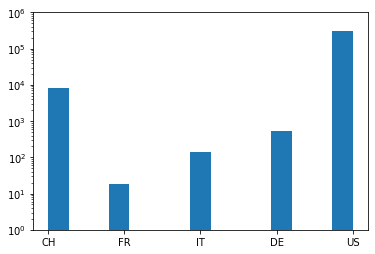

In [37]:
plt.hist(ofr_data["country"], bins=15)
plt.yscale("log")
plt.ylim(1, 1000000)
plt.show()

In [38]:
ofr_data.country.unique()

array(['CH', 'FR', 'IT', 'DE', 'US'], dtype=object)

In [39]:
total_columns = ofr_data.columns

In [40]:
#ofr_data["country"].hist(figsize=(13,10))
#plt.show()

In [41]:
ofr_data.unit.unique()

array(['g', 'ml', 'cl', 'l', 'kg', 'dl'], dtype=object)

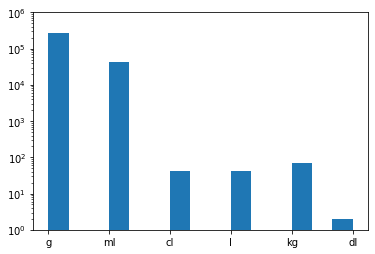

In [42]:
plt.hist(ofr_data["unit"], bins=15)
plt.yscale("log")
plt.ylim(1, 1000000)
plt.show()

In [43]:
#ofr_data["unit"].hist(figsize=(13,10))
#plt.show()

##### __5.Descriptive statistics and informative plots of the numerical variables__

Following table will show as statistical data for each column

In [44]:
ofr_data.describe()

,alcohol_by_volume,calcium_per_hundred,carbohydrates_per_hundred,carbohydrates_per_portion,cholesterol_per_hundred,copper_cu_per_hundred,energy_kcal_per_hundred,energy_kcal_per_portion,energy_per_hundred,energy_per_portion,fat_per_hundred,fat_per_portion,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,fiber_insoluble_per_hundred,fiber_per_hundred,fiber_per_portion,fiber_soluble_per_hundred,folate_total_per_hundred,folic_acid_per_hundred,iron_per_hundred,magnesium_per_hundred,manganese_mn_per_hundred,monounsaturated_fatty_acids_per_hundred,phosphorus_per_hundred,polyunsaturated_fatty_acids_per_hundred,portion_quantity,potassium_k_per_hundred,protein_per_hundred,protein_per_portion,quantity,salt_per_hundred,salt_per_portion,saturated_fat_per_hundred,saturated_fat_per_portion,sodium_per_hundred,sodium_per_portion,sugars_added_per_hundred,sugars_per_hundred,sugars_per_portion,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred,zinc_per_hundred
count,320863.000000,251531.000000,318518.000000,3712.000000,257347.000000,3368.000000,320832.000000,3684.000000,320863.000000,3533.000000,314791.000000,3728.000000,264874.000000,256416.000000,1951.000000,262205.000000,3114.000000,2176.000000,5917.000000,3520.000000,251297.000000,8624.000000,3358.000000,38377.000000,8995.000000,38377.000000,320863.000000,90020.000000,319689.000000,3674.000000,320863.000000,8109.000000,3545.000000,7882.000000,3522.000000,308164.000000,256.000000,41887.000000,301721.000000,3669.000000,183190.000000,7627.000000,17649.000000,16995.000000,19143.000000,4158.000000,10589.000000,189286.000000,62188.000000,6410.000000
mean,0.000137,116.855064,34.182555,19.372605,58.564316,5.838046,272.303226,161.501192,1139.230099,670.192847,12.680333,6.539834,4.999772,0.034349,5.578678,2.919926,1.718157,3.278493,321.166469,559.821080,7.640088,244.115997,1.432490,8.668636,365.780322,5.673704,1.541260,573.278518,7.214627,5.927575,87.552342,0.913136,0.666502,5.946025,2.647391,1.433868,1.807031,23.922310,17.089191,7.759937,497.593362,21.883640,0.867910,1.826164,10.183252,14.082258,1.533821,15.771906,14.243889,7.248117
std,0.027497,2604.840523,41.132448,17.585724,1945.036562,284.196729,260.706588,128.945791,1090.675430,535.438119,19.710343,7.462383,8.628727,1.311847,4.859444,5.975454,2.138090,4.443424,6216.158019,9347.534385,1621.041367,6891.488048,2.549597,14.422802,6728.325062,9.794159,19.836042,11873.559673,10.696716,7.309435,109.838596,2.502483,1.183024,7.964923,3.529671,71.551812,17.005605,25.490258,31.684869,8.252412,2389.351326,458.346947,12.040702,153.452953,76.324107,363.133471,5.172559,597.330098,75.181935,125.555393
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,6.840000,7.200000,0.000000,0.210000,89.000000,82.000000,372.380000,340.000000,0.000000,0.900000,0.000000,0.000000,2.000000,0.000000,0.500000,2.000000,42.000000,70.000000,0.000000,22.000000,0.000000,0.000000,100.000000,0.000000,0.000000,84.000000,0.000000,1.300000,28.000000,0.050000,0.050000,0.500000,0.500000,0.030000,0.020000,5.200000,1.700000,1.000000,0.000000,0.690000,0.000000,0.210000,3.240000,0.590000,0.240000,0.000000,0.000000,1.410000
50%,0.000000,36.000000,23.940000,16.000000,0.000000,0.550000,268.000000,131.000000,1121.310000,546.000000,5.360000,4.800000,2.000000,0.000000,5.000000,1.600000,1.000000,2.000000,1

In order to continue exploring the given data, we will use some informative plots.
In this plots we should see how are our variables distributed and see the relationship between them.

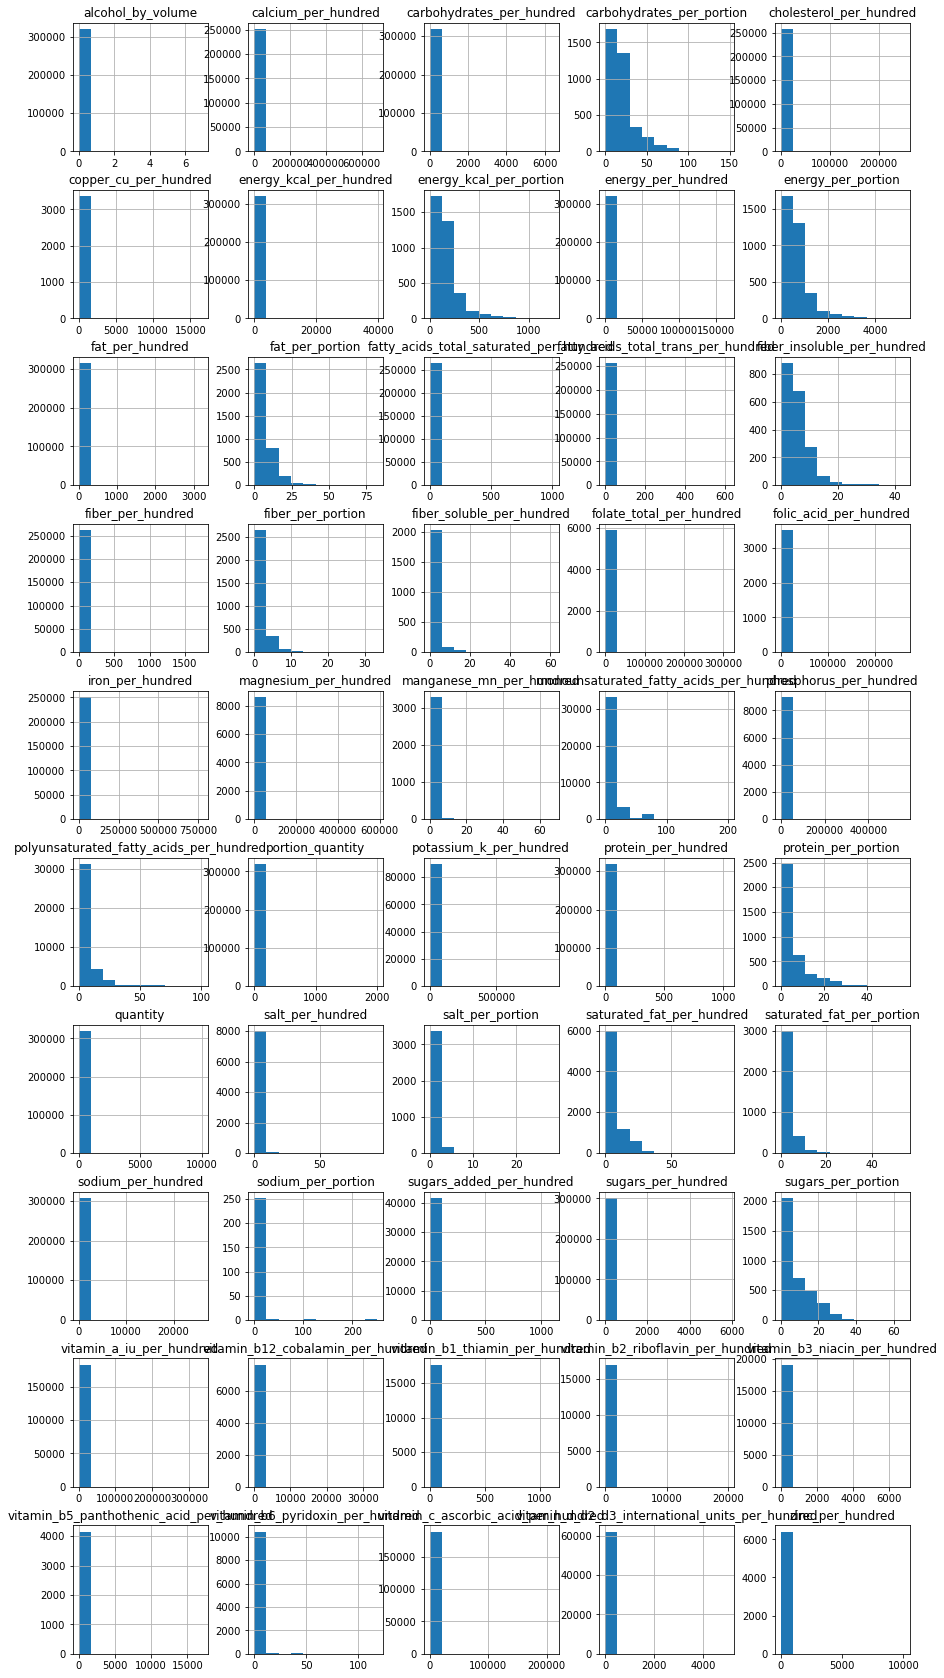

In [45]:
ofr_data.hist(figsize=(15,30),layout=(10,5))
plt.grid(False)
plt.show()

##### __6.1 Creating a new list to hold the columns with the per_hundred suffix in their names__

In [46]:
#ofr_data.loc[:, ofr_data.columns.str.endswith("per_hundred")]
per_hundred_df = ofr_data.filter(regex='per_hundred',axis=1)
per_hundred_df.head()

,calcium_per_hundred,carbohydrates_per_hundred,cholesterol_per_hundred,copper_cu_per_hundred,energy_kcal_per_hundred,energy_per_hundred,fat_per_hundred,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,fiber_insoluble_per_hundred,fiber_per_hundred,fiber_soluble_per_hundred,folate_total_per_hundred,folic_acid_per_hundred,iron_per_hundred,magnesium_per_hundred,manganese_mn_per_hundred,monounsaturated_fatty_acids_per_hundred,phosphorus_per_hundred,polyunsaturated_fatty_acids_per_hundred,potassium_k_per_hundred,protein_per_hundred,salt_per_hundred,saturated_fat_per_hundred,sodium_per_hundred,sugars_added_per_hundred,sugars_per_hundred,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred,zinc_per_hundred
0,NaN,75.00,NaN,NaN,359.0,1500.0,0.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.50,NaN,NaN,242.0,1010.0,18.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.00,0.50,11.00,NaN,NaN,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,52.68,NaN,NaN,325.0,1358.3,12.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.05,0.25,3.03,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,70.40,NaN,NaN,402.0,1679.0,7.90,NaN,NaN,NaN,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.80,NaN,4.20,NaN,NaN,65.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,37.00,NaN,NaN,591.0,2470.0,44.00,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.00,0.06,27.00,NaN,NaN,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
list(per_hundred_df)

['calcium_per_hundred',
 'carbohydrates_per_hundred',
 'cholesterol_per_hundred',
 'copper_cu_per_hundred',
 'energy_kcal_per_hundred',
 'energy_per_hundred',
 'fat_per_hundred',
 'fatty_acids_total_saturated_per_hundred',
 'fatty_acids_total_trans_per_hundred',
 'fiber_insoluble_per_hundred',
 'fiber_per_hundred',
 'fiber_soluble_per_hundred',
 'folate_total_per_hundred',
 'folic_acid_per_hundred',
 'iron_per_hundred',
 'magnesium_per_hundred',
 'manganese_mn_per_hundred',
 'monounsaturated_fatty_acids_per_hundred',
 'phosphorus_per_hundred',
 'polyunsaturated_fatty_acids_per_hundred',
 'potassium_k_per_hundred',
 'protein_per_hundred',
 'salt_per_hundred',
 'saturated_fat_per_hundred',
 'sodium_per_hundred',
 'sugars_added_per_hundred',
 'sugars_per_hundred',
 'vitamin_a_iu_per_hundred',
 'vitamin_b12_cobalamin_per_hundred',
 'vitamin_b1_thiamin_per_hundred',
 'vitamin_b2_riboflavin_per_hundred',
 'vitamin_b3_niacin_per_hundred',
 'vitamin_b5_panthothenic_acid_per_hundred',
 'vitamin

In [48]:
per_hundred_df.describe()

,calcium_per_hundred,carbohydrates_per_hundred,cholesterol_per_hundred,copper_cu_per_hundred,energy_kcal_per_hundred,energy_per_hundred,fat_per_hundred,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,fiber_insoluble_per_hundred,fiber_per_hundred,fiber_soluble_per_hundred,folate_total_per_hundred,folic_acid_per_hundred,iron_per_hundred,magnesium_per_hundred,manganese_mn_per_hundred,monounsaturated_fatty_acids_per_hundred,phosphorus_per_hundred,polyunsaturated_fatty_acids_per_hundred,potassium_k_per_hundred,protein_per_hundred,salt_per_hundred,saturated_fat_per_hundred,sodium_per_hundred,sugars_added_per_hundred,sugars_per_hundred,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred,zinc_per_hundred
count,251531.000000,318518.000000,257347.000000,3368.000000,320832.000000,320863.000000,314791.000000,264874.000000,256416.000000,1951.000000,262205.000000,2176.000000,5917.000000,3520.000000,251297.000000,8624.000000,3358.000000,38377.000000,8995.000000,38377.000000,90020.000000,319689.000000,8109.000000,7882.000000,308164.000000,41887.000000,301721.000000,183190.000000,7627.000000,17649.000000,16995.000000,19143.000000,4158.000000,10589.000000,189286.000000,62188.000000,6410.000000
mean,116.855064,34.182555,58.564316,5.838046,272.303226,1139.230099,12.680333,4.999772,0.034349,5.578678,2.919926,3.278493,321.166469,559.821080,7.640088,244.115997,1.432490,8.668636,365.780322,5.673704,573.278518,7.214627,0.913136,5.946025,1.433868,23.922310,17.089191,497.593362,21.883640,0.867910,1.826164,10.183252,14.082258,1.533821,15.771906,14.243889,7.248117
std,2604.840523,41.132448,1945.036562,284.196729,260.706588,1090.675430,19.710343,8.628727,1.311847,4.859444,5.975454,4.443424,6216.158019,9347.534385,1621.041367,6891.488048,2.549597,14.422802,6728.325062,9.794159,11873.559673,10.696716,2.502483,7.964923,71.551812,25.490258,31.684869,2389.351326,458.346947,12.040702,153.452953,76.324107,363.133471,5.172559,597.330098,75.181935,125.555393
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.840000,0.000000,0.210000,89.000000,372.380000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,42.000000,70.000000,0.000000,22.000000,0.000000,0.000000,100.000000,0.000000,84.000000,0.000000,0.050000,0.500000,0.030000,5.200000,1.700000,0.000000,0.690000,0.000000,0.210000,3.240000,0.590000,0.240000,0.000000,0.000000,1.410000
50%,36.000000,23.940000,0.000000,0.550000,268.000000,1121.310000,5.360000,2.000000,0.000000,5.000000,1.600000,2.000000,114.000000,99.000000,0.990000,73.000000,1.000000,3.330000,200.000000,2.020000,170.000000,4.400000,0.280000,2.200000,0.260000,15.900000,6.670000,0.000000,2.000000,0.000000,0.340000,5.160000,1.430000,0.600000,0.000000,0.000000,3.585000
75%,104.000000,60.000000,25.000000,1.070000,400.000000,1673.600000,20.000000,7.140000,0.000000,8.000000,3.600000,4.000000,214.000000,196.000000,2.400000,143.000000,2.000000,9.090000,357.000000,6.670000,304.000000,10.000000,1.200000,9.000000,0.570000,36.500000,25.000000,354.000000,4.690000,1.000000,0.610000,8.330000,3.130000,1.380000,4.000000,0.000000,6.670000
max,684000.000000,6400.000000,250000.000000,16483.520000,39600.000000,165686.400000,3200.000000,1000.000000,615.380000,43.000000,1730.000000,61.000000,311111.000000,261364.000000,769230.770000,585714.000000,67.000000,200.000000,559459.000000,100.000000,925000.000000,1040.000000,93.600000,93.000000,25833.330000,1100.000000,5800.000000,333333.000000,33898.3100

##### __6.2Finding the unit of each column in the associated unit column__

In [49]:
unit = ofr_data.filter(regex='_unit',axis=1)
unit.head()

,calcium_unit,carbohydrates_unit,cholesterol_unit,copper_cu_unit,energy_kcal_unit,energy_unit,fat_unit,fatty_acids_total_saturated_unit,fatty_acids_total_trans_unit,fiber_insoluble_unit,fiber_soluble_unit,fiber_unit,folate_total_unit,folic_acid_unit,hundred_unit,iron_unit,magnesium_unit,manganese_mn_unit,monounsaturated_fatty_acids_unit,phosphorus_unit,polyunsaturated_fatty_acids_unit,portion_unit,potassium_k_unit,protein_unit,salt_unit,saturated_fat_unit,sodium_unit,sugars_added_unit,sugars_unit,vitamin_a_iu_unit,vitamin_b12_cobalamin_unit,vitamin_b1_thiamin_unit,vitamin_b2_riboflavin_unit,vitamin_b3_niacin_unit,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_unit
0,NaN,g,NaN,NaN,kCal,kJ,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g,NaN,NaN,NaN,NaN,NaN,NaN,g,NaN,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,g,NaN,NaN,kCal,kJ,g,NaN,NaN,NaN,NaN,g,NaN,NaN,g,NaN,NaN,NaN,NaN,NaN,NaN,g,NaN,g,g,g,NaN,NaN,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,g,NaN,NaN,kCal,kJ,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g,NaN,NaN,NaN,NaN,NaN,NaN,g,NaN,g,g,g,NaN,NaN,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,g,NaN,NaN,kCal,kJ,g,NaN,NaN,NaN,NaN,g,NaN,NaN,g,NaN,NaN,NaN,NaN,NaN,NaN,g,NaN,g,NaN,g,NaN,NaN,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,g,NaN,NaN,kCal,kJ,g,NaN,NaN,NaN,NaN,g,NaN,NaN,g,NaN,NaN,NaN,NaN,NaN,NaN,g,NaN,g,g,g,NaN,NaN,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
unit.columns

Index(['calcium_unit', 'carbohydrates_unit', 'cholesterol_unit',
       'copper_cu_unit', 'energy_kcal_unit', 'energy_unit', 'fat_unit',
       'fatty_acids_total_saturated_unit', 'fatty_acids_total_trans_unit',
       'fiber_insoluble_unit', 'fiber_soluble_unit', 'fiber_unit',
       'folate_total_unit', 'folic_acid_unit', 'hundred_unit', 'iron_unit',
       'magnesium_unit', 'manganese_mn_unit',
       'monounsaturated_fatty_acids_unit', 'phosphorus_unit',
       'polyunsaturated_fatty_acids_unit', 'portion_unit', 'potassium_k_unit',
       'protein_unit', 'salt_unit', 'saturated_fat_unit', 'sodium_unit',
       'sugars_added_unit', 'sugars_unit', 'vitamin_a_iu_unit',
       'vitamin_b12_cobalamin_unit', 'vitamin_b1_thiamin_unit',
       'vitamin_b2_riboflavin_unit', 'vitamin_b3_niacin_unit',
       'vitamin_b5_panthothenic_acid_unit', 'vitamin_b6_pyridoxin_unit',
       'vitamin_c_ascorbic_acid_unit',
       'vitamin_d_d2_d3_international_units_per_hundred',
       'vitamin_d_d2_d3_

##### __6.3 The unit of the protein_per_hundred column is g, which means that the values in this column should range between 0 and 100__

In [51]:
ofr_data["protein_per_hundred"].sample(5)

311997     5.41
141490     1.18
35925     12.50
256707     0.00
22412     16.07
Name: protein_per_hundred, dtype: float64

In [52]:
df_protein = ofr_data.loc[(ofr_data["protein_per_hundred"] > 100)]
df_protein

,alcohol_by_volume,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,copper_cu_unit,country,created_at,energy_kcal_per_hundred,energy_kcal_per_portion,energy_kcal_unit,energy_per_hundred,energy_per_portion,energy_unit,fat_per_hundred,fat_per_portion,fat_unit,fatty_acids_total_saturated_per_hundred,fatty_acids_total_saturated_unit,fatty_acids_total_trans_per_hundred,fatty_acids_total_trans_unit,fiber_insoluble_per_hundred,fiber_insoluble_unit,fiber_per_hundred,fiber_per_portion,fiber_soluble_per_hundred,fiber_soluble_unit,fiber_unit,folate_total_per_hundred,folate_total_unit,folic_acid_per_hundred,folic_acid_unit,hundred_unit,ingredients_en,iron_per_hundred,iron_unit,magnesium_per_hundred,magnesium_unit,manganese_mn_per_hundred,manganese_mn_unit,monounsaturated_fatty_acids_per_hundred,monounsaturated_fatty_acids_unit,phosphorus_per_hundred,phosphorus_unit,polyunsaturated_fatty_acids_per_hundred,polyunsaturated_fatty_acids_unit,portion_quantity,portion_unit,potassium_k_per_hundred,potassium_k_unit,protein_per_hundred,protein_per_portion,protein_unit,quantity,salt_per_hundred,salt_per_portion,salt_unit,saturated_fat_per_hundred,saturated_fat_per_portion,saturated_fat_unit,sodium_per_hundred,sodium_per_portion,sodium_unit,sugars_added_per_hundred,sugars_added_unit,sugars_per_hundred,sugars_per_portion,sugars_unit,unit,updated_at,vitamin_a_iu_per_hundred,vitamin_a_iu_unit,vitamin_b12_cobalamin_per_hundred,vitamin_b12_cobalamin_unit,vitamin_b1_thiamin_per_hundred,vitamin_b1_thiamin_unit,vitamin_b2_riboflavin_per_hundred,vitamin_b2_riboflavin_unit,vitamin_b3_niacin_per_hundred,vitamin_b3_niacin_unit,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit,product_name
288514,0.0,NaN,NaN,3380.95,NaN,g,NaN,NaN,NaN,NaN,US,2021-04-26T10:22:27.918Z,9952.0,NaN,kCal,41639.17,NaN,kJ,1000.00,NaN,g,357.14,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g,"WHEAT FLOUR, SUGAR, VEGETABLE OILS AND FATS, H...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,g,NaN,NaN,238.10,NaN,g,21.0,NaN,NaN,NaN,NaN,NaN,NaN,1.81,NaN,g,NaN,NaN,1714.29,NaN,g,g,2021-04-26T10:22:27.918Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COFFEE BREAK COOKIES
288559,0.0,3125.0,mg,473.75,NaN,g,81.0,mg,6.25,mg,US,2021-04-26T10:22:27.918Z,5312.0,NaN,kCal,22225.41,NaN,kJ,283.75,NaN,g,25.00,g,0.0,g,NaN,NaN,37.5,NaN,NaN,NaN,g,NaN,NaN,3125.0,µg,ml,"WATER, CORN SYRUP SOLIDS, CASEINATES (CALCIUM,...",56.25,mg,625.0,mg,6.0,mg,200.0,g,2125.0,mg,51.25,g,0.0,ml,3125.0,mg,238.75,NaN,g,240.0,NaN,NaN,NaN,NaN,NaN,NaN,3.13,NaN,g,NaN,NaN,105.00,NaN,g,ml,2021-04-26T10:22:27.918Z,9375.0,IU,28.75,µg,7.0,mg,8.00,mg,93.75,mg,47.50,mg,25.00,mg,312.5,mg,250.0,IU,80.00,mg,"HOMEMADE VANILLA WITH CARB STEADY SHAKE, HOMEM..."
288617,0.0,350.0,mg,1400.00,NaN,g,0.0,mg,NaN,NaN,US,2021-04-26T10:22:27.918Z,7500.0,NaN,kCal,31380.00,NaN,kJ,125.00,NaN,g,0.00,g,0.0,g,NaN,NaN,50.0,NaN,NaN,NaN,g,NaN,NaN,NaN,NaN,g,"ENRICHED FLOUR (WHEAT FLOUR, MALTED BARLEY FLO...",80.00,mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,g,2000.0,mg,200.00,NaN,g,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,g,100.00,NaN,g,g,2021-04-26T10:22:27.918Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,IU,NaN,NaN,SOFT PRETZEL BREAD BITES
289235,0.0,0.0,mg,85.00,NaN,g,0.0,mg,NaN,NaN,US,2021-04-26T10:22:27.918Z,650.0,NaN,kCal,2719.60,NaN,kJ,50.00,NaN,g,10.00,g,0.0,g,NaN,NaN,0.0,NaN,NaN,NaN,g,NaN,NaN,NaN,NaN,g,"LAVER, RICE FLOUR, SESAME, GOCHUJANG(RED PEPPE...",36.00,mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,g,NaN,NaN,130.00,NaN,g,2.0,NaN,NaN,NaN,NaN,NaN,NaN,7.80,NaN,g,NaN,NaN,0.00,NaN,g,g,2021-04-26T10:22:27.9

In [53]:
ofr_data.drop(ofr_data[ofr_data['protein_per_hundred'] > 100].index, inplace = True)
ofr_data.drop(ofr_data[ofr_data['protein_per_hundred'] < 0].index, inplace = True)

In [54]:
df_protein = ofr_data.loc[(ofr_data["protein_per_hundred"] > 100)]
df_protein

,alcohol_by_volume,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,copper_cu_unit,country,created_at,energy_kcal_per_hundred,energy_kcal_per_portion,energy_kcal_unit,energy_per_hundred,energy_per_portion,energy_unit,fat_per_hundred,fat_per_portion,fat_unit,fatty_acids_total_saturated_per_hundred,fatty_acids_total_saturated_unit,fatty_acids_total_trans_per_hundred,fatty_acids_total_trans_unit,fiber_insoluble_per_hundred,fiber_insoluble_unit,fiber_per_hundred,fiber_per_portion,fiber_soluble_per_hundred,fiber_soluble_unit,fiber_unit,folate_total_per_hundred,folate_total_unit,folic_acid_per_hundred,folic_acid_unit,hundred_unit,ingredients_en,iron_per_hundred,iron_unit,magnesium_per_hundred,magnesium_unit,manganese_mn_per_hundred,manganese_mn_unit,monounsaturated_fatty_acids_per_hundred,monounsaturated_fatty_acids_unit,phosphorus_per_hundred,phosphorus_unit,polyunsaturated_fatty_acids_per_hundred,polyunsaturated_fatty_acids_unit,portion_quantity,portion_unit,potassium_k_per_hundred,potassium_k_unit,protein_per_hundred,protein_per_portion,protein_unit,quantity,salt_per_hundred,salt_per_portion,salt_unit,saturated_fat_per_hundred,saturated_fat_per_portion,saturated_fat_unit,sodium_per_hundred,sodium_per_portion,sodium_unit,sugars_added_per_hundred,sugars_added_unit,sugars_per_hundred,sugars_per_portion,sugars_unit,unit,updated_at,vitamin_a_iu_per_hundred,vitamin_a_iu_unit,vitamin_b12_cobalamin_per_hundred,vitamin_b12_cobalamin_unit,vitamin_b1_thiamin_per_hundred,vitamin_b1_thiamin_unit,vitamin_b2_riboflavin_per_hundred,vitamin_b2_riboflavin_unit,vitamin_b3_niacin_per_hundred,vitamin_b3_niacin_unit,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit,product_name


##### 6.4 Units range

If a column’s unit is mg, then the values should range between 0 and 10^5.
First we will fillter columns that contain mg as a unit.
Then we take per_hundrerd columns with mg units and then we are going to put limits. 

In [55]:
df6 = unit.filter(regex='mg$', axis=0)
print(df6)

Empty DataFrame
Columns: [calcium_unit, carbohydrates_unit, cholesterol_unit, copper_cu_unit, energy_kcal_unit, energy_unit, fat_unit, fatty_acids_total_saturated_unit, fatty_acids_total_trans_unit, fiber_insoluble_unit, fiber_soluble_unit, fiber_unit, folate_total_unit, folic_acid_unit, hundred_unit, iron_unit, magnesium_unit, manganese_mn_unit, monounsaturated_fatty_acids_unit, phosphorus_unit, polyunsaturated_fatty_acids_unit, portion_unit, potassium_k_unit, protein_unit, salt_unit, saturated_fat_unit, sodium_unit, sugars_added_unit, sugars_unit, vitamin_a_iu_unit, vitamin_b12_cobalamin_unit, vitamin_b1_thiamin_unit, vitamin_b2_riboflavin_unit, vitamin_b3_niacin_unit, vitamin_b5_panthothenic_acid_unit, vitamin_b6_pyridoxin_unit, vitamin_c_ascorbic_acid_unit, vitamin_d_d2_d3_international_units_per_hundred, vitamin_d_d2_d3_international_units_unit, zinc_unit]
Index: []


In [56]:
ofr_data[ofr_data == 'mg']

,alcohol_by_volume,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,copper_cu_unit,country,created_at,energy_kcal_per_hundred,energy_kcal_per_portion,energy_kcal_unit,energy_per_hundred,energy_per_portion,energy_unit,fat_per_hundred,fat_per_portion,fat_unit,fatty_acids_total_saturated_per_hundred,fatty_acids_total_saturated_unit,fatty_acids_total_trans_per_hundred,fatty_acids_total_trans_unit,fiber_insoluble_per_hundred,fiber_insoluble_unit,fiber_per_hundred,fiber_per_portion,fiber_soluble_per_hundred,fiber_soluble_unit,fiber_unit,folate_total_per_hundred,folate_total_unit,folic_acid_per_hundred,folic_acid_unit,hundred_unit,ingredients_en,iron_per_hundred,iron_unit,magnesium_per_hundred,magnesium_unit,manganese_mn_per_hundred,manganese_mn_unit,monounsaturated_fatty_acids_per_hundred,monounsaturated_fatty_acids_unit,phosphorus_per_hundred,phosphorus_unit,polyunsaturated_fatty_acids_per_hundred,polyunsaturated_fatty_acids_unit,portion_quantity,portion_unit,potassium_k_per_hundred,potassium_k_unit,protein_per_hundred,protein_per_portion,protein_unit,quantity,salt_per_hundred,salt_per_portion,salt_unit,saturated_fat_per_hundred,saturated_fat_per_portion,saturated_fat_unit,sodium_per_hundred,sodium_per_portion,sodium_unit,sugars_added_per_hundred,sugars_added_unit,sugars_per_hundred,sugars_per_portion,sugars_unit,unit,updated_at,vitamin_a_iu_per_hundred,vitamin_a_iu_unit,vitamin_b12_cobalamin_per_hundred,vitamin_b12_cobalamin_unit,vitamin_b1_thiamin_per_hundred,vitamin_b1_thiamin_unit,vitamin_b2_riboflavin_per_hundred,vitamin_b2_riboflavin_unit,vitamin_b3_niacin_per_hundred,vitamin_b3_niacin_unit,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit,product_name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,.

In [57]:
ofr_data.shape

(320697, 95)

In [58]:
df6_4 = ofr_data.filter(regex='_per_hundred$|mg')
df6_4

,calcium_per_hundred,carbohydrates_per_hundred,cholesterol_per_hundred,copper_cu_per_hundred,energy_kcal_per_hundred,energy_per_hundred,fat_per_hundred,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,fiber_insoluble_per_hundred,fiber_per_hundred,fiber_soluble_per_hundred,folate_total_per_hundred,folic_acid_per_hundred,iron_per_hundred,magnesium_per_hundred,manganese_mn_per_hundred,monounsaturated_fatty_acids_per_hundred,phosphorus_per_hundred,polyunsaturated_fatty_acids_per_hundred,potassium_k_per_hundred,protein_per_hundred,salt_per_hundred,saturated_fat_per_hundred,sodium_per_hundred,sugars_added_per_hundred,sugars_per_hundred,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred,zinc_per_hundred
0,NaN,75.00,NaN,NaN,359.0,1500.0,0.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.50,NaN,NaN,242.0,1010.0,18.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.00,0.50,11.00,NaN,NaN,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,52.68,NaN,NaN,325.0,1358.3,12.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.05,0.25,3.03,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,70.40,NaN,NaN,402.0,1679.0,7.90,NaN,NaN,NaN,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.80,NaN,4.20,NaN,NaN,65.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,37.00,NaN,NaN,591.0,2470.0,44.00,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.00,0.06,27.00,NaN,NaN,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320858,NaN,2.80,NaN,NaN,184.0,756.0,16.00,NaN,NaN,NaN,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.60,1.50,1.40,NaN,NaN,2.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320859,NaN,55.00,NaN,NaN,285.0,1202.0,6.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.10,0.05,4.90,NaN,NaN,43.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320860,NaN,48.00,NaN,NaN,578.0,2406.0,37.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.00,0.13,15.00,NaN,NaN,42.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320861,NaN,41.00,NaN,NaN,570.0,2370.0,40.00,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.00,0.00,25.00,NaN,NaN,38.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df_calcium = ofr_data.loc[(ofr_data["calcium_per_hundred"] > 100000)]
df_calcium

,alcohol_by_volume,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,copper_cu_unit,country,created_at,energy_kcal_per_hundred,energy_kcal_per_portion,energy_kcal_unit,energy_per_hundred,energy_per_portion,energy_unit,fat_per_hundred,fat_per_portion,fat_unit,fatty_acids_total_saturated_per_hundred,fatty_acids_total_saturated_unit,fatty_acids_total_trans_per_hundred,fatty_acids_total_trans_unit,fiber_insoluble_per_hundred,fiber_insoluble_unit,fiber_per_hundred,fiber_per_portion,fiber_soluble_per_hundred,fiber_soluble_unit,fiber_unit,folate_total_per_hundred,folate_total_unit,folic_acid_per_hundred,folic_acid_unit,hundred_unit,ingredients_en,iron_per_hundred,iron_unit,magnesium_per_hundred,magnesium_unit,manganese_mn_per_hundred,manganese_mn_unit,monounsaturated_fatty_acids_per_hundred,monounsaturated_fatty_acids_unit,phosphorus_per_hundred,phosphorus_unit,polyunsaturated_fatty_acids_per_hundred,polyunsaturated_fatty_acids_unit,portion_quantity,portion_unit,potassium_k_per_hundred,potassium_k_unit,protein_per_hundred,protein_per_portion,protein_unit,quantity,salt_per_hundred,salt_per_portion,salt_unit,saturated_fat_per_hundred,saturated_fat_per_portion,saturated_fat_unit,sodium_per_hundred,sodium_per_portion,sodium_unit,sugars_added_per_hundred,sugars_added_unit,sugars_per_hundred,sugars_per_portion,sugars_unit,unit,updated_at,vitamin_a_iu_per_hundred,vitamin_a_iu_unit,vitamin_b12_cobalamin_per_hundred,vitamin_b12_cobalamin_unit,vitamin_b1_thiamin_per_hundred,vitamin_b1_thiamin_unit,vitamin_b2_riboflavin_per_hundred,vitamin_b2_riboflavin_unit,vitamin_b3_niacin_per_hundred,vitamin_b3_niacin_unit,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit,product_name
292621,0.0,240000.0,mg,130.00,NaN,g,0.0,mg,NaN,NaN,US,2021-04-26T10:22:30.297Z,500.0,NaN,kCal,2092.00,NaN,kJ,3.00,NaN,g,0.00,g,0.00,g,NaN,NaN,17.0,NaN,NaN,NaN,g,NaN,NaN,NaN,NaN,g,"PURE CANE SUGAR, SEA SALT, LEMON ZEST, TELLICH...",5000.00,mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,g,NaN,NaN,9.00,NaN,g,1.0,NaN,NaN,NaN,NaN,NaN,NaN,21.10,NaN,g,NaN,NaN,84.00,NaN,g,g,2021-04-26T10:22:30.297Z,6900.0,IU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,mg,0.0,IU,NaN,NaN,WEST AFRICAN PARADISE RUB
292819,0.0,517857.0,mg,3.57,NaN,g,79.0,mg,NaN,NaN,US,2021-04-26T10:22:30.297Z,279.0,NaN,kCal,1167.34,NaN,kJ,21.43,NaN,g,14.29,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g,"GOUDA CHEESE, (COW'S MILK, SALT, CHEESE CULTUR...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,g,NaN,NaN,17.86,NaN,g,28.0,NaN,NaN,NaN,NaN,NaN,NaN,1.19,NaN,g,NaN,NaN,NaN,NaN,NaN,g,2021-04-26T10:22:30.297Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SPREADABLE GOUDA
292820,0.0,532143.0,mg,NaN,NaN,NaN,64.0,mg,NaN,NaN,US,2021-04-26T10:22:30.297Z,250.0,NaN,kCal,1046.00,NaN,kJ,21.43,NaN,g,14.29,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g,"GOAT CHEESE (GOAT'S MILK, SALT, CHEESE CULTURE...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,g,NaN,NaN,17.86,NaN,g,28.0,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,g,NaN,NaN,NaN,NaN,NaN,g,2021-04-26T10:22:30.297Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SPREADABLE GOAT CHEESE
292975,0.0,107692.0,mg,48.72,NaN,g,NaN,NaN,NaN,NaN,US,2021-04-26T10:22:30.297Z,333.0,NaN,kCal,1393.27,NaN,kJ,3.85,NaN,g,NaN,NaN,NaN,NaN,NaN,NaN,7.7,NaN,NaN,NaN,g,NaN,NaN,NaN,NaN,g,"GARBANZO BEAN FLOUR, NON-DAIRY BUTTER FLAVOR (...",5.13,mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,g,436.0,mg,10.26,NaN,g,39.0,NaN,NaN,NaN,NaN,NaN,NaN,1.15,NaN,g,NaN,NaN,15.38,NaN,g,g,2021-04-26T10:22:30.297Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [60]:
ofr_data.drop(ofr_data[ofr_data['calcium_per_hundred'] >= 100000 ].index, inplace = True)

In [61]:
#ofr_data.columns

In [62]:
#ofr_data["vitamin_a_iu_unit"].unique()

In [63]:
mg_columns = ["calcium_per_hundred", "carbohydrates_per_hundred", "cholesterol_per_hundred",
              "energy_kcal_per_hundred","energy_per_hundred", "fat_per_hundred", "fatty_acids_total_saturated_per_hundred",
              "fatty_acids_total_trans_per_hundred", "fiber_per_hundred", "iron_per_hundred", 
              "protein_per_hundred", "sodium_per_hundred", "sugars_per_hundred", 
              "vitamin_a_iu_per_hundred", "vitamin_c_ascorbic_acid_per_hundred"]

In [64]:
for i in mg_columns:
    ofr_data.drop(ofr_data[ofr_data[i] >= 100000].index, inplace = True)
    ofr_data.drop(ofr_data[ofr_data[i] < 0].index, inplace = True)

In [65]:
ofr_data.shape

(320644, 95)

In [66]:
ofr_data.describe()

,alcohol_by_volume,calcium_per_hundred,carbohydrates_per_hundred,carbohydrates_per_portion,cholesterol_per_hundred,copper_cu_per_hundred,energy_kcal_per_hundred,energy_kcal_per_portion,energy_per_hundred,energy_per_portion,fat_per_hundred,fat_per_portion,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,fiber_insoluble_per_hundred,fiber_per_hundred,fiber_per_portion,fiber_soluble_per_hundred,folate_total_per_hundred,folic_acid_per_hundred,iron_per_hundred,magnesium_per_hundred,manganese_mn_per_hundred,monounsaturated_fatty_acids_per_hundred,phosphorus_per_hundred,polyunsaturated_fatty_acids_per_hundred,portion_quantity,potassium_k_per_hundred,protein_per_hundred,protein_per_portion,quantity,salt_per_hundred,salt_per_portion,saturated_fat_per_hundred,saturated_fat_per_portion,sodium_per_hundred,sodium_per_portion,sugars_added_per_hundred,sugars_per_hundred,sugars_per_portion,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred,zinc_per_hundred
count,320644.000000,251455.000000,318321.000000,3712.000000,257176.000000,3350.000000,320613.000000,3684.000000,320644.000000,3533.000000,314588.000000,3728.000000,264700.000000,256232.000000,1951.000000,262049.000000,3114.000000,2176.000000,5909.000000,3501.000000,251228.000000,8603.000000,3340.000000,38317.000000,8976.000000,38317.000000,320644.000000,89893.000000,319470.000000,3674.000000,320644.000000,8109.000000,3545.000000,7882.000000,3522.000000,307951.000000,256.000000,41870.000000,301531.000000,3669.000000,183162.000000,7606.000000,17630.000000,16975.000000,19123.000000,4138.000000,10569.000000,189251.000000,62175.000000,6392.000000
mean,0.000137,97.700957,33.904391,19.372605,44.601067,5.674412,270.297603,161.501192,1130.839327,670.192847,12.612617,6.539834,4.980546,0.034355,5.578678,2.895499,1.718157,3.278493,320.319343,558.625878,3.388641,242.652024,1.404581,8.604124,358.317736,5.620171,1.542313,568.197270,7.104211,5.927575,87.516477,0.913136,0.666502,5.946025,2.647391,1.423115,1.807031,23.889525,16.933977,7.759937,488.693790,21.833723,0.864875,1.823910,10.145731,14.055159,1.526525,14.551137,14.089136,7.169862
std,0.027506,478.633245,33.172680,17.585724,1221.377494,284.781001,207.590381,128.945791,868.429570,535.438119,18.645407,7.462383,8.299765,1.312287,4.859444,4.781348,2.138090,4.443424,6220.309229,9372.765875,149.113337,6899.805134,2.511929,14.309070,6733.222911,9.692850,19.842774,11880.907137,8.669107,7.309435,109.810383,2.502483,1.183024,7.964923,3.529671,71.538545,17.005605,25.389076,24.792416,8.252412,2012.993856,458.961080,12.046772,153.543309,76.352819,364.009197,5.170729,350.660562,72.688450,125.720450
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,6.800000,7.200000,0.000000,0.210000,89.000000,82.000000,372.380000,340.000000,0.000000,0.900000,0.000000,0.000000,2.000000,0.000000,0.500000,2.000000,42.000000,69.000000,0.000000,22.000000,0.000000,0.000000,100.000000,0.000000,0.000000,84.000000,0.000000,1.300000,28.000000,0.050000,0.050000,0.500000,0.500000,0.030000,0.020000,5.200000,1.700000,1.000000,0.000000,0.690000,0.000000,0.210000,3.230000,0.590000,0.240000,0.000000,0.000000,1.400000
50%,0.000000,36.000000,23.910000,16.000000,0.000000,0.535000,268.000000,131.000000,1121.310000,546.000000,5.360000,4.800000,2.000000,0.000000,5.000000,1.500000,1.000000,2.000000,114.00

##### __7.Other inconsistencies in the data__

Sum of a product’s protein, fat, carbohydrates, salt, and fiber content should be equal 100.
Meaning, that we can't have product which sum of macronutrients is bigger than 100.

In [67]:
ofr_data['Sum'] = ofr_data['carbohydrates_per_hundred'] + ofr_data['fat_per_hundred'] + ofr_data['protein_per_hundred'] + ofr_data['salt_per_hundred'] + ofr_data['fiber_per_hundred']
ofr_data[["Sum","product_name"]].set_index('product_name')
ofr_data[["Sum","product_name"]].sort_values(by=['Sum'], ascending=False)

,Sum,product_name
6560,114.03,"naturaplan, Macadamia, noix"
7951,110.03,Original beans - Cusco chuncho 100%
2134,107.90,ZWEIFEL SEL DE POPCORN
8796,107.78,Premier Protein - Double chocolate cookie
4039,106.30,Lucul Chinoise Mix Pour Fondue Chinoise
...,...,...
320856,NaN,Lindt - Noir prodigieux 90% cacao
320857,NaN,Niederegger Lübeck - Pralinés au chocolat noir
320859,NaN,Mochi Queen - Mochi (Mango)
320860,NaN,Lindt - Chocolat lait (33% nougat-amandes)


In [68]:
ofr_data.shape

(320644, 96)

We will remove all rows where the sum is greater than 100

In [69]:
ofr_data.drop(ofr_data[ofr_data['Sum'] > 100 ].index, inplace = True)

In [70]:
ofr_data.shape

(320611, 96)

In [71]:
ofr_data = ofr_data.dropna(subset=["Sum"]).reset_index(drop=True)

In [72]:
ofr_data.columns

Index(['alcohol_by_volume', 'calcium_per_hundred', 'calcium_unit',
       'carbohydrates_per_hundred', 'carbohydrates_per_portion',
       'carbohydrates_unit', 'cholesterol_per_hundred', 'cholesterol_unit',
       'copper_cu_per_hundred', 'copper_cu_unit', 'country', 'created_at',
       'energy_kcal_per_hundred', 'energy_kcal_per_portion',
       'energy_kcal_unit', 'energy_per_hundred', 'energy_per_portion',
       'energy_unit', 'fat_per_hundred', 'fat_per_portion', 'fat_unit',
       'fatty_acids_total_saturated_per_hundred',
       'fatty_acids_total_saturated_unit',
       'fatty_acids_total_trans_per_hundred', 'fatty_acids_total_trans_unit',
       'fiber_insoluble_per_hundred', 'fiber_insoluble_unit',
       'fiber_per_hundred', 'fiber_per_portion', 'fiber_soluble_per_hundred',
       'fiber_soluble_unit', 'fiber_unit', 'folate_total_per_hundred',
       'folate_total_unit', 'folic_acid_per_hundred', 'folic_acid_unit',
       'hundred_unit', 'ingredients_en', 'iron_per_hundred

##### __8.Addressing outliers__

In [73]:
ofr_data.describe()

,alcohol_by_volume,calcium_per_hundred,carbohydrates_per_hundred,carbohydrates_per_portion,cholesterol_per_hundred,copper_cu_per_hundred,energy_kcal_per_hundred,energy_kcal_per_portion,energy_per_hundred,energy_per_portion,fat_per_hundred,fat_per_portion,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,fiber_insoluble_per_hundred,fiber_per_hundred,fiber_per_portion,fiber_soluble_per_hundred,folate_total_per_hundred,folic_acid_per_hundred,iron_per_hundred,magnesium_per_hundred,manganese_mn_per_hundred,monounsaturated_fatty_acids_per_hundred,phosphorus_per_hundred,polyunsaturated_fatty_acids_per_hundred,portion_quantity,potassium_k_per_hundred,protein_per_hundred,protein_per_portion,quantity,salt_per_hundred,salt_per_portion,saturated_fat_per_hundred,saturated_fat_per_portion,sodium_per_hundred,sodium_per_portion,sugars_added_per_hundred,sugars_per_hundred,sugars_per_portion,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred,zinc_per_hundred,Sum
count,5675.0,94.000000,5675.000000,2980.000000,0.0,2.000000,5664.000000,2946.000000,5675.000000,2861.000000,5675.000000,2998.000000,0.0,0.0,0.0,5675.000000,2974.000000,0.0,0.0,84.000000,69.000000,43.000000,1.0,68.000000,38.000000,67.000000,5675.000000,2.000000,5675.000000,2977.000000,5675.000000,5675.000000,2990.000000,5438.000000,2879.000000,248.000000,147.000000,0.0,5639.000000,2972.000000,0.0,79.000000,110.000000,68.000000,83.000000,65.000000,92.000000,123.000000,0.0,53.000000,5675.000000
mean,0.0,271.336170,30.957214,19.981903,NaN,0.180000,275.816649,165.750913,1152.987419,683.581667,12.971267,6.570380,NaN,NaN,NaN,2.938937,1.736698,NaN,NaN,104.463095,5.616377,106.706977,1.3,21.227941,232.342105,8.484627,63.358287,350.085000,7.548717,6.197071,315.352634,0.828361,0.693144,5.070984,2.574012,2.446492,1.334558,NaN,14.364597,7.332981,NaN,1.276835,1.215273,1.872647,6.637831,2.513231,1.099783,53.506341,NaN,2.356792,55.244497
std,0.0,233.690098,26.370720,17.637960,NaN,0.113137,180.929288,126.105133,753.465439,517.185692,15.473355,7.343985,NaN,NaN,NaN,4.236736,2.151452,NaN,NaN,118.604591,4.921792,161.534084,NaN,26.599999,225.264562,13.640373,100.960774,494.854539,7.226430,7.285149,286.820703,1.582708,1.218945,7.046084,3.449806,9.262318,8.989850,NaN,18.941965,8.028886,NaN,1.549578,5.675556,9.632525,5.637707,2.177730,4.143135,108.259666,NaN,1.817614,32.818417
min,0.0,20.000000,0.000000,0.000000,NaN,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.500000,4.500000,1.3,0.000000,24.000000,0.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.100000,0.050000,0.090000,0.400000,0.320000,0.040000,0.000000,NaN,0.490000,0.000000
25%,0.0,79.500000,7.000000,7.800000,NaN,0.140000,111.000000,86.000000,465.000000,360.000000,1.500000,1.000000,NaN,NaN,NaN,0.500000,0.500000,NaN,NaN,30.000000,1.100000,5.600000,1.3,1.300000,32.750000,0.600000,0.000000,175.127500,2.500000,1.500000,140.000000,0.060000,0.050000,0.500000,0.500000,0.100000,0.060000,NaN,1.500000,1.000000,NaN,0.380000,0.200000,0.200000,2.400000,0.900000,0.210000,12.000000,NaN,0.730000,24.115000
50%,0.0,203.500000,22.000000,16.800000,NaN,0.180000,254.500000,134.000000,1064.000000,559.000000,7.000000,4.900000,NaN,NaN,NaN,1.800000,1.000000,NaN,NaN,60.000000,4.200000,41.000000,1.3,3.650000,142.500000,2.400000,25.000000,350.085000,6.000000,3.500000,240.000000,0.330000,0.200000,2.000000,1.300000,0.300000,0.240000,NaN,4.500000,4.000000,NaN,1.000000,0.700000,0.600000,6.000000,2.000000,0.540000,25.000000,NaN,2.100000,51.000000
75%,0.0,450.000000,54.400000,26.100000,NaN,0.220000,404.000000,206.000000,1694.000000,858.000000,20.000000,9.47500

We can see from descriptive statistics above that min and max values have some irregularity.

In [74]:
ofr_data.drop(['cholesterol_per_hundred',
                                'fatty_acids_total_saturated_per_hundred',
                                'fiber_soluble_per_hundred',
                                'fiber_insoluble_per_hundred',
                                'fatty_acids_total_trans_per_hundred',
                                'vitamin_d_d2_d3_international_units_per_hundred',
                                'sugars_added_per_hundred',
                                'vitamin_a_iu_per_hundred','folate_total_per_hundred',], axis=1, inplace = True)

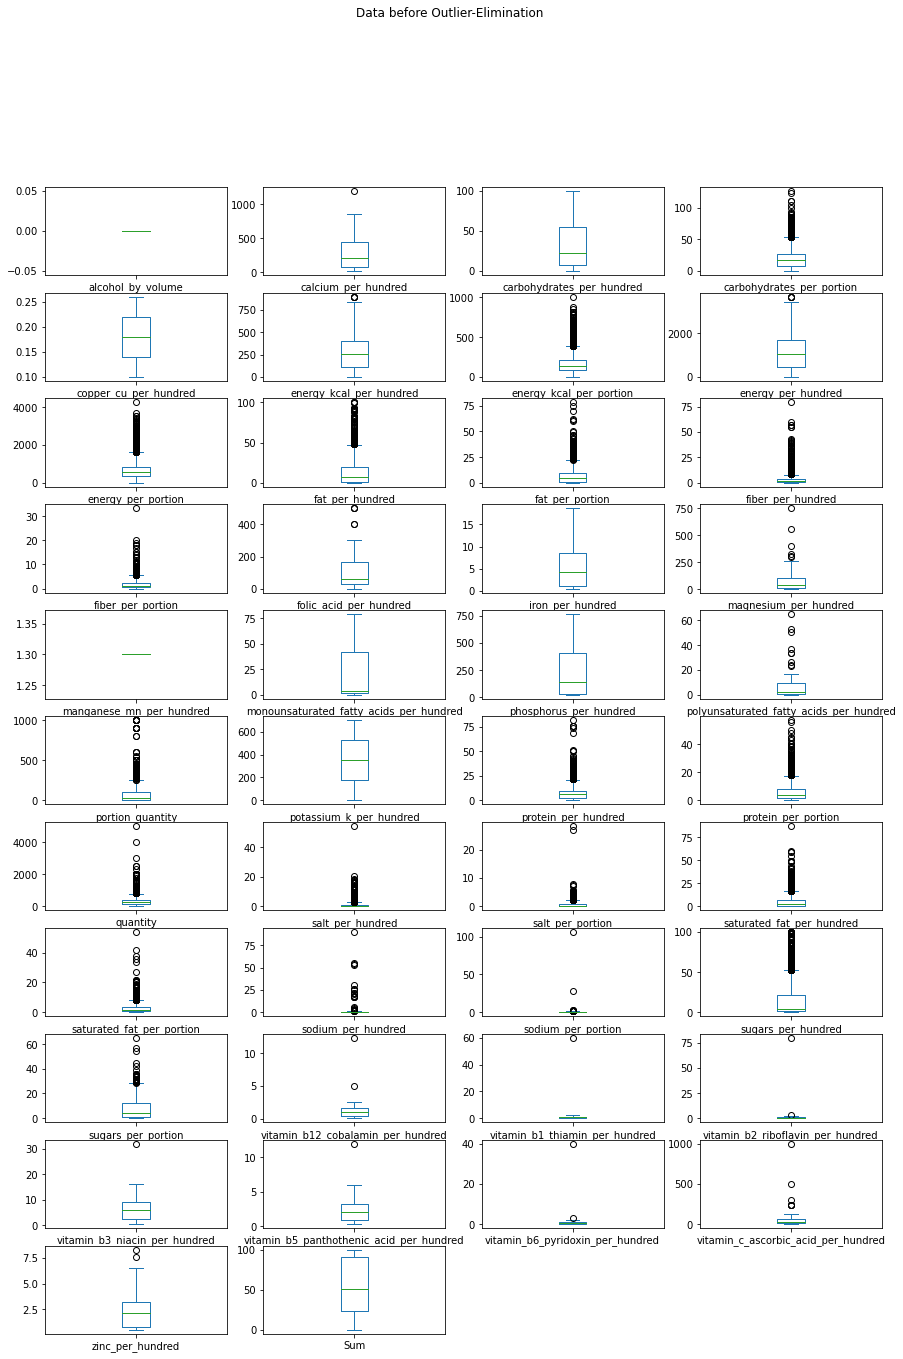

In [75]:
ofr_data.select_dtypes(include=float).plot(kind='box', subplots=True, title='Data before Outlier-Elimination', figsize=(15,25),layout=(13,4))
plt.show()

From boxplots above we see that a lot of observation are very distant from the rest of the data, so we are going to address that now

Firstly, we will roughly remove the values that do not belong to the data

In [76]:
ofr_data.shape

(5675, 87)

In [77]:
df_energy = ofr_data.loc[(ofr_data["energy_per_hundred"] > 50000)]
df_energy

,alcohol_by_volume,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_unit,copper_cu_per_hundred,copper_cu_unit,country,created_at,energy_kcal_per_hundred,energy_kcal_per_portion,energy_kcal_unit,energy_per_hundred,energy_per_portion,energy_unit,fat_per_hundred,fat_per_portion,fat_unit,fatty_acids_total_saturated_unit,fatty_acids_total_trans_unit,fiber_insoluble_unit,fiber_per_hundred,fiber_per_portion,fiber_soluble_unit,fiber_unit,folate_total_unit,folic_acid_per_hundred,folic_acid_unit,hundred_unit,ingredients_en,iron_per_hundred,iron_unit,magnesium_per_hundred,magnesium_unit,manganese_mn_per_hundred,manganese_mn_unit,monounsaturated_fatty_acids_per_hundred,monounsaturated_fatty_acids_unit,phosphorus_per_hundred,phosphorus_unit,polyunsaturated_fatty_acids_per_hundred,polyunsaturated_fatty_acids_unit,portion_quantity,portion_unit,potassium_k_per_hundred,potassium_k_unit,protein_per_hundred,protein_per_portion,protein_unit,quantity,salt_per_hundred,salt_per_portion,salt_unit,saturated_fat_per_hundred,saturated_fat_per_portion,saturated_fat_unit,sodium_per_hundred,sodium_per_portion,sodium_unit,sugars_added_unit,sugars_per_hundred,sugars_per_portion,sugars_unit,unit,updated_at,vitamin_a_iu_unit,vitamin_b12_cobalamin_per_hundred,vitamin_b12_cobalamin_unit,vitamin_b1_thiamin_per_hundred,vitamin_b1_thiamin_unit,vitamin_b2_riboflavin_per_hundred,vitamin_b2_riboflavin_unit,vitamin_b3_niacin_per_hundred,vitamin_b3_niacin_unit,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit,product_name,Sum


In [78]:
#ofr_data.drop(ofr_data[ofr_data['energy_per_hundred'] >= 5000].index, inplace = True)
#ofr_data.drop(ofr_data[ofr_data['energy_kcal_per_hundred'] >= 10000].index, inplace = True)

In [79]:
#ofr_data.drop(ofr_data[ofr_data['calcium_per_hundred'] >= 250].index, inplace = True)

In [80]:
#ofr_data.drop(ofr_data[ofr_data['carbohydrates_per_hundred'] >= 1000].index, inplace = True)

In [81]:
#ofr_data.drop(ofr_data[ofr_data['cholesterol_per_hundred'] >= 100].index, inplace = True)

In [82]:
ofr_data.drop(ofr_data[ofr_data['fat_per_hundred'] >= 500].index, inplace = True)

In [83]:
ofr_data.shape

(5675, 87)

In [84]:
per_hundred_df = ofr_data.filter(regex='per_hundred',axis=1)
per_hundred_df.head()

,calcium_per_hundred,carbohydrates_per_hundred,copper_cu_per_hundred,energy_kcal_per_hundred,energy_per_hundred,fat_per_hundred,fiber_per_hundred,folic_acid_per_hundred,iron_per_hundred,magnesium_per_hundred,manganese_mn_per_hundred,monounsaturated_fatty_acids_per_hundred,phosphorus_per_hundred,polyunsaturated_fatty_acids_per_hundred,potassium_k_per_hundred,protein_per_hundred,salt_per_hundred,saturated_fat_per_hundred,sodium_per_hundred,sugars_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,zinc_per_hundred
0,NaN,1.5,NaN,242.0,1010.0,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,0.50,11.0,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,37.0,NaN,591.0,2470.0,44.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,0.06,27.0,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,60.5,NaN,535.0,2235.0,29.5,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.6,0.15,18.0,NaN,59.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,70.0,NaN,357.0,1490.0,1.5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,0.00,0.5,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,80.0,NaN,328.0,1370.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.00,0.0,NaN,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


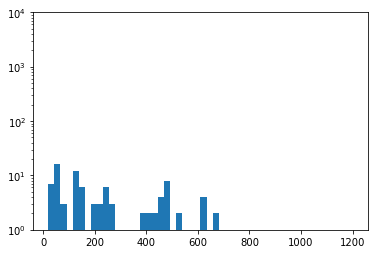

In [85]:
plt.hist(ofr_data["calcium_per_hundred"], bins=50)
plt.yscale("log")
plt.ylim(1, 10000)
plt.show()

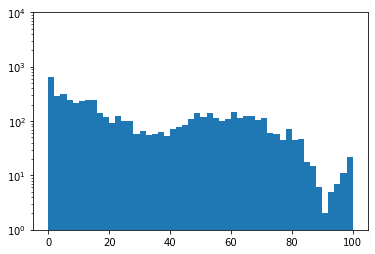

In [86]:
plt.hist(ofr_data["carbohydrates_per_hundred"], bins=50)
plt.yscale("log")
plt.ylim(1, 10000)
plt.show()

In [87]:
#ofr_data["cholesterol_per_hundred"].isnull().sum()
#plt.hist(ofr_data["cholesterol_per_hundred"], bins=50)
#plt.yscale("log")
#plt.ylim(1, 1000)
#plt.show()

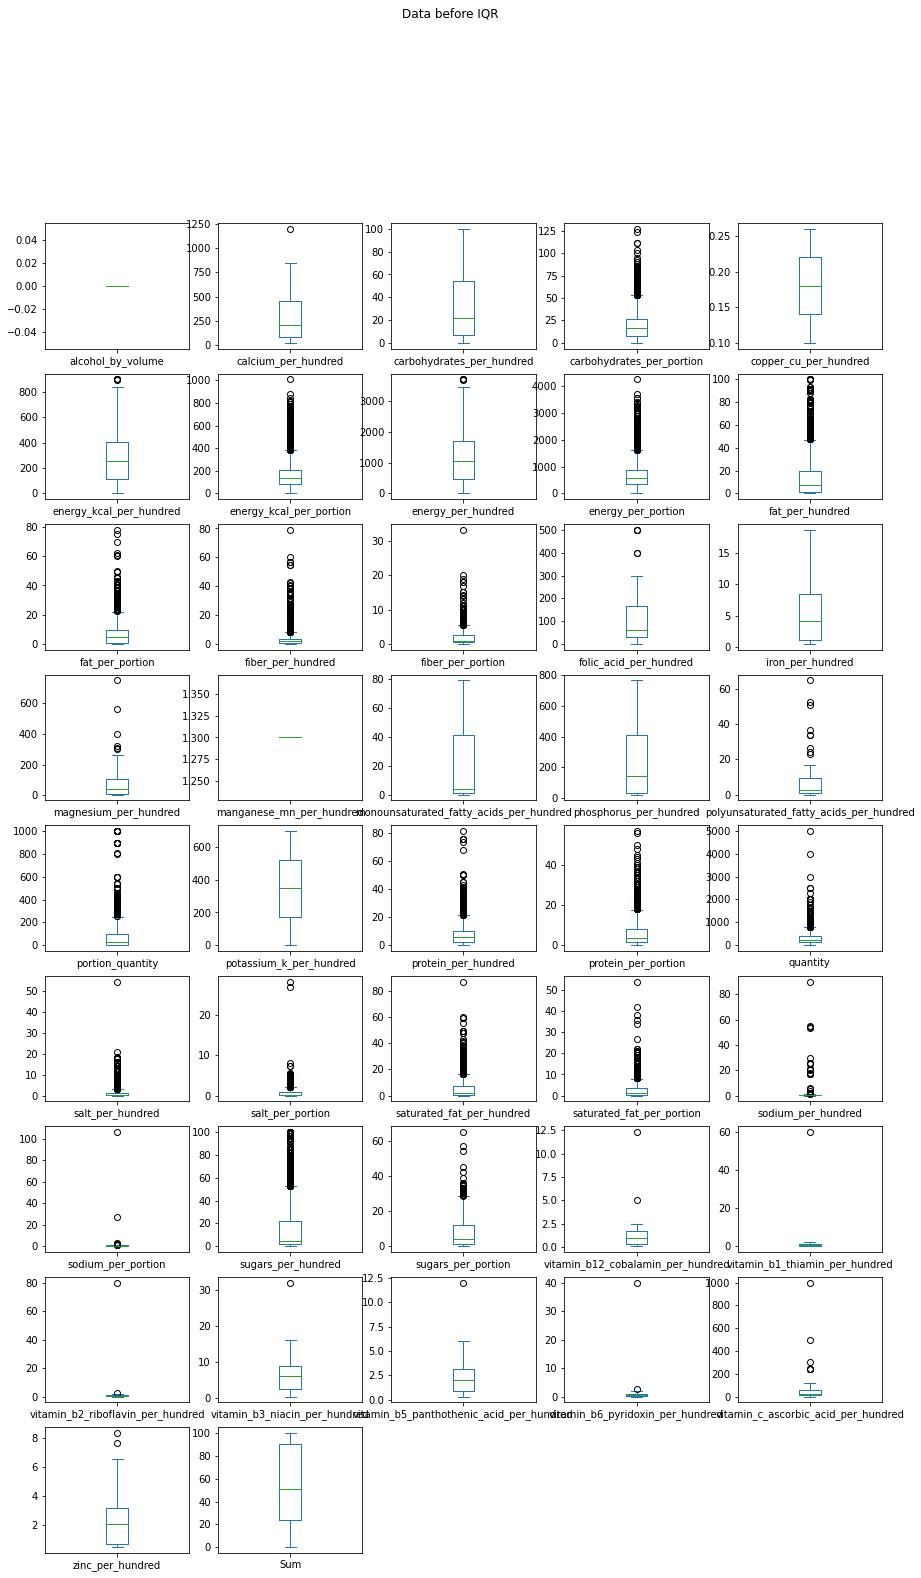

In [88]:
ofr_data.select_dtypes(include=float).plot(kind='box', subplots=True, title='Data before IQR',figsize=(15,30),layout=(11,5))
plt.show()

In [89]:
list(per_hundred_df)

['calcium_per_hundred',
 'carbohydrates_per_hundred',
 'copper_cu_per_hundred',
 'energy_kcal_per_hundred',
 'energy_per_hundred',
 'fat_per_hundred',
 'fiber_per_hundred',
 'folic_acid_per_hundred',
 'iron_per_hundred',
 'magnesium_per_hundred',
 'manganese_mn_per_hundred',
 'monounsaturated_fatty_acids_per_hundred',
 'phosphorus_per_hundred',
 'polyunsaturated_fatty_acids_per_hundred',
 'potassium_k_per_hundred',
 'protein_per_hundred',
 'salt_per_hundred',
 'saturated_fat_per_hundred',
 'sodium_per_hundred',
 'sugars_per_hundred',
 'vitamin_b12_cobalamin_per_hundred',
 'vitamin_b1_thiamin_per_hundred',
 'vitamin_b2_riboflavin_per_hundred',
 'vitamin_b3_niacin_per_hundred',
 'vitamin_b5_panthothenic_acid_per_hundred',
 'vitamin_b6_pyridoxin_per_hundred',
 'vitamin_c_ascorbic_acid_per_hundred',
 'zinc_per_hundred']

We want to visualize data using boxplot

In [90]:
def plot_boxplot(df, ch):
    df.boxplot(column=[ch])
    plt.show()

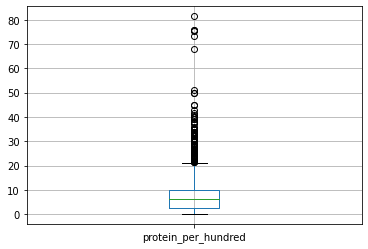

In [91]:
plot_boxplot(ofr_data, "protein_per_hundred")

##### Removeing outliers

In [92]:
#https://www.quora.com/How-can-I-remove-outliers-in-a-large-dataset-with-pandas/answer/Joel-Pires-3
# defining fucntion called "outliers" which returns a list of index of outliers 
# IQR = Q3-Q1
# +/- 1.5*IQR

def outliers(df, ch):
    Q1 = df[ch].quantile(0.25)
    Q3 = df[ch].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    #creating a list that will store indexes of outliers
    ls = df.index[(df[ch] < lower_bound) | (df[ch] > upper_bound)]
    # we use these two conditions because if either of these conditions are true it means that it its an outlier
    return ls

In [93]:
#creating an empty list to store outputs from mulitple columns
#'cholesterol_per_hundred','vitamin_a_iu_per_hundred','fatty_acids_total_saturated_per_hundred','fatty_acids_total_trans_per_hundred',
index_list = []
for per_hundred in ['calcium_per_hundred',
 'carbohydrates_per_hundred',
 'energy_kcal_per_hundred',
 'energy_per_hundred',
 'fat_per_hundred',
 'vitamin_c_ascorbic_acid_per_hundred',
 'sugars_per_hundred',
 'iron_per_hundred',
 'protein_per_hundred',
 'sodium_per_hundred',
 'fiber_per_hundred'
]:
    #we want to save output indexes into the same list and to do that we are going to use extand fucntion
    index_list.extend(outliers(ofr_data, per_hundred))


In [94]:
#indexes of outliers : it shows that in this row is an outlier
#index_list

In [95]:
#defining function called "remove" which returns cleaned df without outliers
def remove(df, lis):
    lis=sorted(set(lis))
    df=df.drop(lis)
    return df

In [96]:
df_cleaned = remove(ofr_data, index_list)

In [97]:
df_cleaned.shape

(4558, 87)

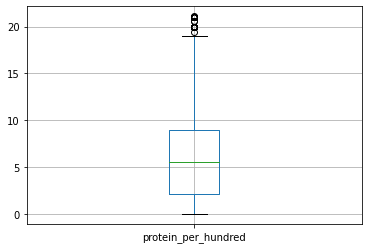

In [98]:
plot_boxplot(df_cleaned, "protein_per_hundred")

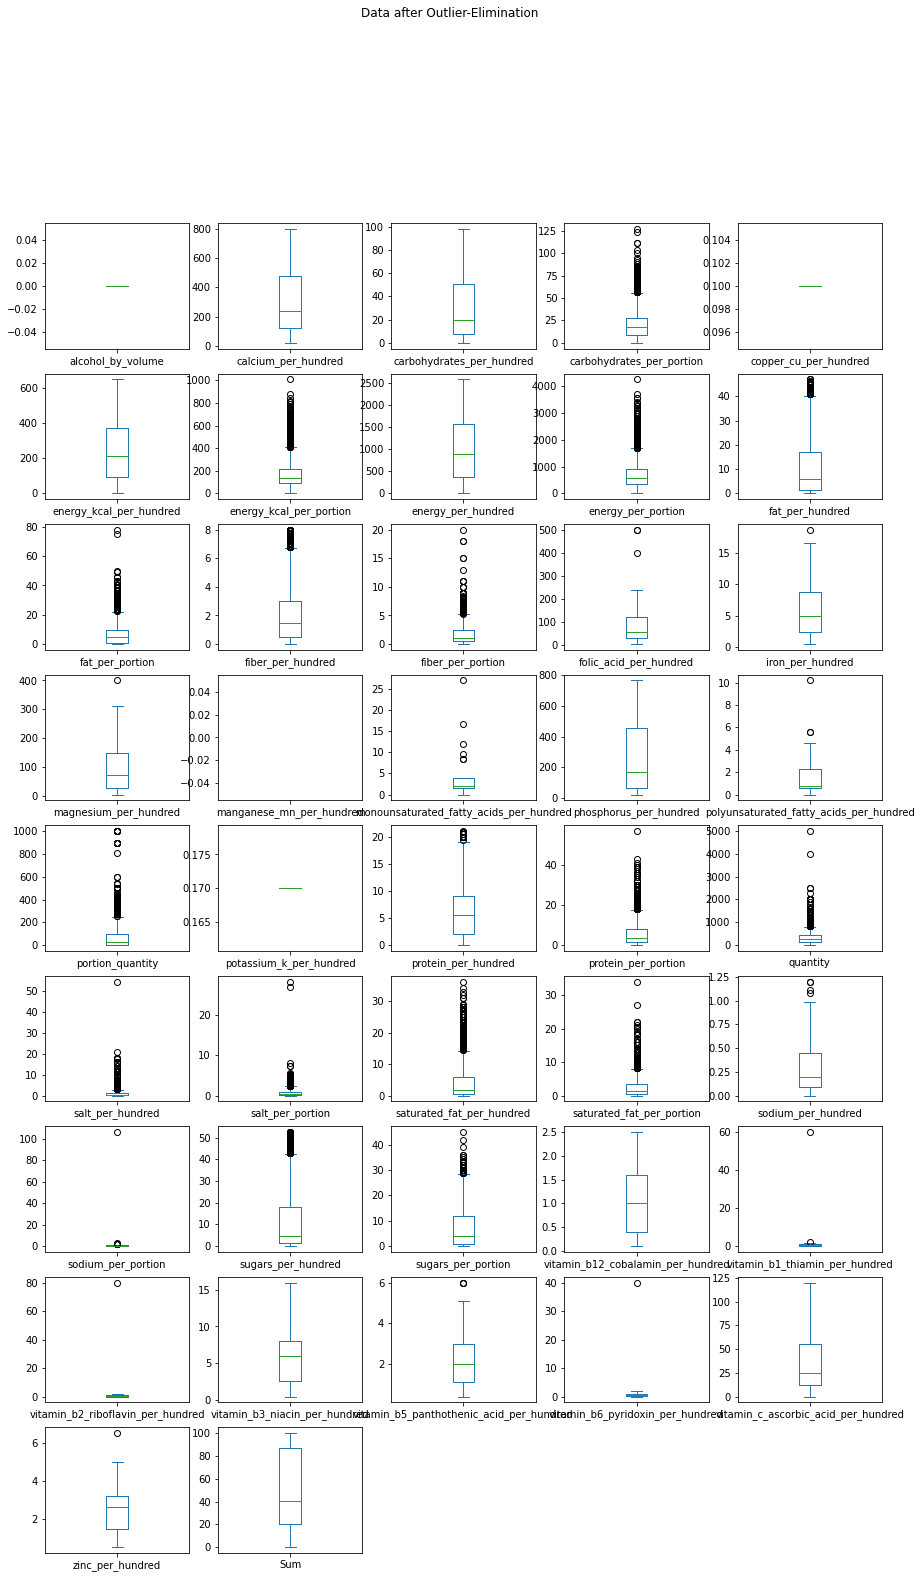

In [99]:
df_cleaned.select_dtypes(include=float).plot(kind='box', subplots=True, title='Data after Outlier-Elimination', figsize=(15,30),layout=(11,5))
plt.show()

we will dedicate a little bit more attention to column energy_per_hundred since we need it for later

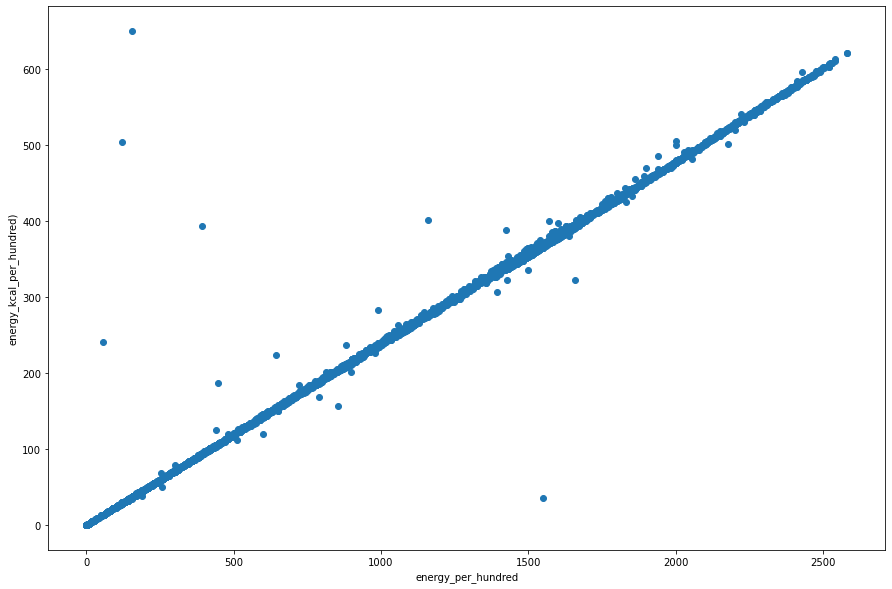

In [100]:

# Scatter plot
fig, ax = plt.subplots(figsize = (15,10))
ax.scatter(df_cleaned['energy_per_hundred'], df_cleaned['energy_kcal_per_hundred'])
 
# x-axis label
ax.set_xlabel('energy_per_hundred')
 
# y-axis label
ax.set_ylabel('energy_kcal_per_hundred)')
plt.show()

In [101]:
zfilterX = np.abs(df_cleaned["energy_per_hundred"] - df_cleaned["energy_per_hundred"].mean()) > (3 * df_cleaned["energy_per_hundred"].std())
zfilterX.loc[zfilterX ==True]

Series([], Name: energy_per_hundred, dtype: bool)

In [102]:
zfilterX.drop(zfilterX[(zfilterX ==True)].index, inplace = True)

In [103]:
df_cleaned.shape

(4558, 87)

From the graphs shown above, we can see that our data looks much nicer.
Now we will save our cleaned data in a new csv file.

In [104]:
df_cleaned.to_csv("data_385k_cleaned.csv", index=False)

## C. In-depth Exploratory Data Analysis

In [105]:
df = pd.read_csv('data_385k_cleaned.csv', low_memory=False)

##### __The minerals’ distribution per country__

In [106]:
col = [col for col in df.columns if col in ['calcium_per_hundred', 'phosphorus_per_hundred', 'potassium_k_per_hundred', 
                                             'sodium_per_hundred', 'magnesium_per_hundred', 'iron_per_hundred',
                                             'copper_cu_per_hundred','manganese_mn_per_hundred', 'country']]
df2 = df[col]

In [107]:
df2

,calcium_per_hundred,copper_cu_per_hundred,country,iron_per_hundred,magnesium_per_hundred,manganese_mn_per_hundred,phosphorus_per_hundred,potassium_k_per_hundred,sodium_per_hundred
0,NaN,NaN,CH,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,CH,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,CH,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,CH,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,CH,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4553,NaN,NaN,CH,NaN,NaN,NaN,NaN,NaN,NaN
4554,NaN,NaN,CH,NaN,NaN,NaN,NaN,NaN,NaN
4555,NaN,NaN,CH,NaN,NaN,NaN,NaN,NaN,NaN
4556,NaN,NaN,CH,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
gr = df2.groupby('country')
gr.first()

,calcium_per_hundred,copper_cu_per_hundred,iron_per_hundred,magnesium_per_hundred,manganese_mn_per_hundred,phosphorus_per_hundred,potassium_k_per_hundred,sodium_per_hundred
country,,,,,,,,
CH,630.0,0.1,14.0,260.0,NaN,765.0,0.17,0.07
DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IT,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN


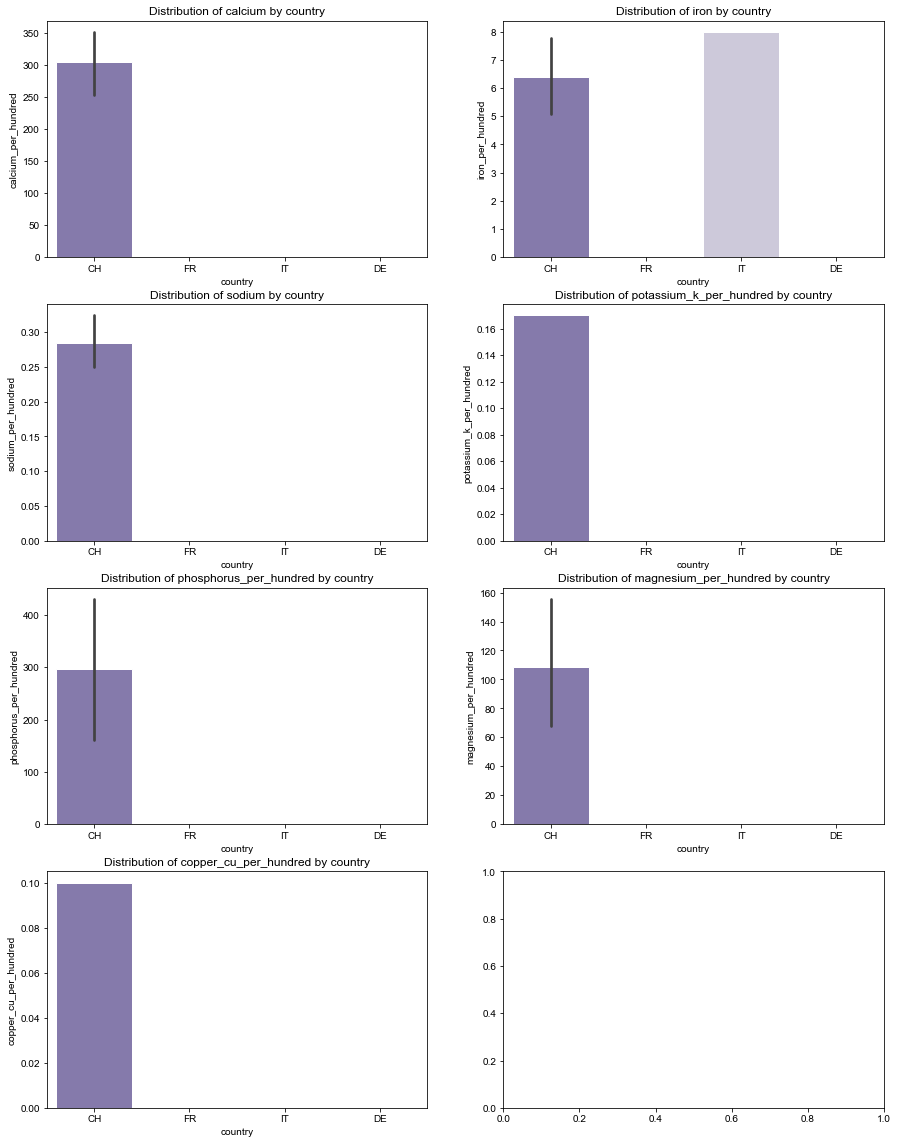

In [109]:
#defining plotting region
fig, axes = plt.subplots(4,2,figsize=(15, 20))
#ax is a two-dimensional array: one dimension for the rows, one for the columns
#so we are going to be flattening ax first
axes = axes.flatten()
sns.set_theme(style="dark")
#creating boxplot in each subplot
sns.barplot(data=df2, x='country', y="calcium_per_hundred", ax=axes[0], palette="light:m_r").set(title='Distribution of calcium by country')
sns.barplot(data=df2, x='country', y="iron_per_hundred", ax=axes[1], palette="light:m_r").set(title='Distribution of iron by country')
sns.barplot(data=df2, x='country', y="sodium_per_hundred", ax=axes[2], palette="light:m_r").set(title='Distribution of sodium by country')
sns.barplot(data=df2, x='country', y="potassium_k_per_hundred", ax=axes[3], palette="light:m_r").set(title='Distribution of potassium_k_per_hundred by country')
sns.barplot(data=df2, x='country', y="phosphorus_per_hundred", ax=axes[4], palette="light:m_r").set(title='Distribution of phosphorus_per_hundred by country')
sns.barplot(data=df2, x='country', y="magnesium_per_hundred", ax=axes[5], palette="light:m_r").set(title='Distribution of magnesium_per_hundred by country')
sns.barplot(data=df2, x='country', y="copper_cu_per_hundred", ax=axes[6], palette="light:m_r").set(title='Distribution of copper_cu_per_hundred by country')
#sns.barplot(data=df2, x='country', y="manganese_mn_per_hundred", ax=axes[7], palette="light:m_r").set(title='Distribution of manganese_mn_per_hundred by country')
plt.show()

In some plots we got error bars that are representations of data variability and are used on graphs to indicate uncertainty in a reported measurement.

## D. Text data

##### __Most frequent ingredients in products__

In [110]:
df = df.applymap(lambda s:s.lower() if isinstance(s, str) else s)
df['ingredients_en'].sample

<bound method NDFrame.sample of 0                    bio milk (switzerland), kitchen salt
1                                       durum wheat flour
2       popped corn, rapeseed oil, sugar, rice flour, ...
3       water, fruit juice based on 9.6% concentrates ...
4           potatoes, sunflower oil (36%), sea salt (1%).
                              ...                        
4553    sparkling water, cane sugar* (9%), concentrate...
4554    chickpea flour 41.6%, sunflower oil, potato st...
4555    pear 59%, banana 25%, coconut milk 10% (coconu...
4556    oat (flakes/wholegrain flour) 37%, raw cane su...
4557    water, canola oil*, stabilizers (carrageenan, ...
Name: ingredients_en, Length: 4558, dtype: object>

In [111]:
df["ingredients_en"].iloc[3]

'water, fruit juice based on 9.6% concentrates (pear 8%, watermelon 1.4%, pineapple 0.1%, kiwi 0.1%), sugar, mango puree 0.5%, acidifier: acid citric, dyes: blueberry, carrot and sweet potato juice based on concentrates, natural flavor, antioxidant: ascorbic acid, stabilizers: gum arabic and glyceric esters of wood resins.'

In [112]:
df['ingredients_en'] = df.ingredients_en.str.replace(' and ?' , ',', regex=True)
df['ingredients_en'] = df.ingredients_en.str.replace(' and/?' , ',', regex=True)

In [113]:
df['ingredients_en']

0                    bio milk (switzerland), kitchen salt
1                                       durum wheat flour
2       popped corn, rapeseed oil, sugar, rice flour, ...
3       water, fruit juice based on 9.6% concentrates ...
4           potatoes, sunflower oil (36%), sea salt (1%).
                              ...                        
4553    sparkling water, cane sugar* (9%), concentrate...
4554    chickpea flour 41.6%, sunflower oil, potato st...
4555    pear 59%, banana 25%, coconut milk 10% (coconu...
4556    oat (flakes/wholegrain flour) 37%, raw cane su...
4557    water, canola oil*, stabilizers (carrageenan, ...
Name: ingredients_en, Length: 4558, dtype: object

In [114]:
df['ingredients_en'] = df.ingredients_en.str.replace(r"[\"\'\(\)\[\]\{\}\…\-\:\?\&\*\+\|\%]", ',', regex=True)

In [115]:
df['ingredients_en']

0                    bio milk ,switzerland,, kitchen salt
1                                       durum wheat flour
2       popped corn, rapeseed oil, sugar, rice flour, ...
3       water, fruit juice based on 9.6, concentrates ...
4           potatoes, sunflower oil ,36,,, sea salt ,1,,.
                              ...                        
4553    sparkling water, cane sugar, ,9,,, concentrate...
4554    chickpea flour 41.6,, sunflower oil, potato st...
4555    pear 59,, banana 25,, coconut milk 10, ,coconu...
4556    oat ,flakes/wholegrain flour, 37,, raw cane su...
4557    water, canola oil,, stabilizers ,carrageenan, ...
Name: ingredients_en, Length: 4558, dtype: object

In [116]:
df['ingredients_en'] = df.ingredients_en.str.strip()

In [117]:
df['ingredients_en']

0                    bio milk ,switzerland,, kitchen salt
1                                       durum wheat flour
2       popped corn, rapeseed oil, sugar, rice flour, ...
3       water, fruit juice based on 9.6, concentrates ...
4           potatoes, sunflower oil ,36,,, sea salt ,1,,.
                              ...                        
4553    sparkling water, cane sugar, ,9,,, concentrate...
4554    chickpea flour 41.6,, sunflower oil, potato st...
4555    pear 59,, banana 25,, coconut milk 10, ,coconu...
4556    oat ,flakes/wholegrain flour, 37,, raw cane su...
4557    water, canola oil,, stabilizers ,carrageenan, ...
Name: ingredients_en, Length: 4558, dtype: object

In [118]:
df['ingredients_en'] = df.ingredients_en.str.replace(', ,', ',')
df['ingredients_en'] = df.ingredients_en.str.replace(' ,', ', ')
df['ingredients_en'] = df.ingredients_en.str.replace(',,', ',')

In [119]:
df['ingredients_en']

0                     bio milk, switzerland, kitchen salt
1                                       durum wheat flour
2       popped corn, rapeseed oil, sugar, rice flour, ...
3       water, fruit juice based on 9.6, concentrates,...
4             potatoes, sunflower oil, 36,, sea salt, 1,.
                              ...                        
4553    sparkling water, cane sugar,9,, concentrated l...
4554    chickpea flour 41.6, sunflower oil, potato sta...
4555    pear 59, banana 25, coconut milk 10,coconut, w...
4556    oat, flakes/wholegrain flour, 37, raw cane sug...
4557    water, canola oil, stabilizers, carrageenan, x...
Name: ingredients_en, Length: 4558, dtype: object

In [120]:
ingredients = df['ingredients_en'].str.split(',').apply(Series, 1).stack()

In [121]:
ingredients.index = ingredients.index.droplevel(-1)
ingredients.name = 'ingredients'
data_ingredients = df.join(ingredients)

In [122]:
print('Number of unique ingredients: {}'.format(data_ingredients['ingredients'].dropna().unique().shape[0]))

Number of unique ingredients: 15831


In [123]:
data_ingredients = data_ingredients[data_ingredients.ingredients != ' ']
data_ingredients = data_ingredients[data_ingredients.ingredients != '.']
data_ingredients = data_ingredients[data_ingredients.ingredients != '']

In [124]:
print('The ten most common ingredients:\n{}'.format(data_ingredients['ingredients'].value_counts().head(10)))

The ten most common ingredients:
 sugar            2023
 water            1893
 cooking salt     1269
 emulsifier        819
 sunflower oil     722
 wheat flour       689
 spices            622
 salt              615
 rapeseed oil      602
 acidifier         599
Name: ingredients, dtype: int64


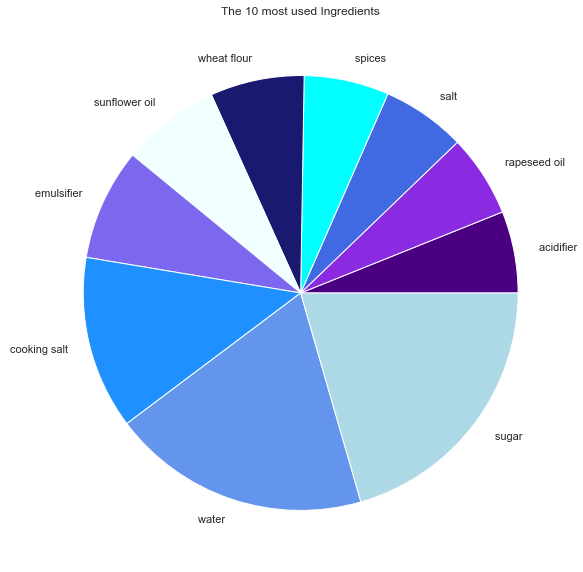

In [125]:

data_ingredients['ingredients'].value_counts().head(10).sort_values().plot(kind='pie', figsize=(15,10), 
                                                                           colors=["indigo",
                                                                                   "blueviolet",
                                                                                   "royalblue",
                                                                                   "cyan",
                                                                                   "midnightblue",
                                                                                   "azure",
                                                                                   "mediumslateblue",
                                                                                  "dodgerblue",
                                                                                   "cornflowerblue", "lightblue"])
plt.title('The 10 most used Ingredients')
plt.ylabel('')
plt.show()

##### __The longest ingredients list__

In [126]:
data_ingredients['len'] = data_ingredients['ingredients'].apply(len)

In [127]:
max_ing_list=data_ingredients[['product_name','ingredients', 'len']][data_ingredients.len == data_ingredients['len'].max()]
max_ing_list

,product_name,ingredients,len
1055,coop qualité & prix cocktail de fruits de mer cru,the white shrimps in this product come from ...,143


##### __Products that have the shortest ingredients list__

In [128]:
min_ing_list=data_ingredients[['product_name','ingredients', 'len']][data_ingredients.len == data_ingredients['len'].min()]
min_ing_list

## E. Time-series data

##### __1.Exploring the total number of items created each month at each hour__

We are going to work with the created_at column that stores the date and time at wich products were added to the Open Food database.

We are going to investigate the total number of items created each month at each hour. We will use the created_at column to draw a heatmap with the hours (0 to 23) on the 
x
-axis and the months (1 to 12) on the 
y
-axis. The color of the heatmap should show the number of items created at each month-hour pair.

In [129]:
df['created_at']

0       2016-06-01t11:42:25.111z
1       2016-06-02t14:01:51.499z
2       2016-06-02t14:03:01.930z
3       2016-06-02t14:04:00.606z
4       2016-06-02t14:04:08.811z
                  ...           
4553    2021-04-06t14:41:03.750z
4554    2021-04-11t14:58:09.619z
4555    2021-04-22t05:38:10.446z
4556    2021-05-18t11:12:55.773z
4557    2021-09-24t07:26:19.082z
Name: created_at, Length: 4558, dtype: object

Now we are going to transfrom are time-series data to appropraite model form

In [130]:
df['created_at'] = pd.to_datetime(ofr_data['created_at'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df["created_at"]

0      2016-06-01 11:42:25.111
1      2016-06-01 11:42:26.350
2      2016-06-02 14:01:44.255
3      2016-06-02 14:01:51.499
4      2016-06-02 14:01:53.274
                 ...          
4553   2017-11-27 08:38:54.166
4554   2017-11-27 09:11:26.933
4555   2017-11-27 09:17:50.562
4556   2017-11-27 09:19:58.311
4557   2017-11-27 09:26:02.309
Name: created_at, Length: 4558, dtype: datetime64[ns]

In [131]:
df['created_at'].describe()

count                           4558
unique                          4557
top       2016-09-13 06:59:33.362000
freq                               2
first     2016-05-31 17:54:07.264000
last      2017-11-27 09:26:02.309000
Name: created_at, dtype: object

Now we are going to extract month values as new 'month' column form created_at column

In [132]:
df['month'] = pd.DatetimeIndex(df['created_at']).month

In [133]:
df['month']

0        6
1        6
2        6
3        6
4        6
        ..
4553    11
4554    11
4555    11
4556    11
4557    11
Name: month, Length: 4558, dtype: int64

Now we are going to extract hours values from created_at column and make a new one that is called 'hours'

In [134]:
df['hour'] = pd.DatetimeIndex(df['created_at']).hour

In [135]:
df['hour']

0       11
1       11
2       14
3       14
4       14
        ..
4553     8
4554     9
4555     9
4556     9
4557     9
Name: hour, Length: 4558, dtype: int64

Now we are going to group the data by month/hour combinations

In [136]:
df_t = df.groupby(["hour", "month"]).count()
df_t

alcohol_by_volume  calcium_per_hundred  calcium_unit  \
hour month                                                         
0    7                    116                    8             8   
1    7                      1                    0             0   
6    6                      9                    0             0   
     7                    212                    3             3   
     8                      1                    0             0   
     9                     92                    0             0   
7    3                      1                    0             0   
     6                      2                    0             0   
     7                     11                    0             0   
     8                      3                    0             0   
     9                     21                    0             0   
     10                     1                    0             0   
     11                    13                    0             0   
8    4                      1                    0             0   
     6                      3                    0             0   
     11                     8                    0             0   
9    2                      1                    0             0   
     3                      2                    0             0   
     6                      2                    0             0   
     11                    18                    0             0   
     12                     3                    0             0   
10   6                     10                    1             1   
     7                    119                    1             1   
     8                      1                    0             0   
     9                     53                    0             0   
     11                     2                    0             0   
11   1                      2                    0             0   
     6                      7                    0             0   
     7                     62                    0             0   
     9                    107                    0             0   
     11                    17                    0             0   
12   1                      1                    0             0   
     6                     23                    0             0   
     9                    150                    0             0   
     10                     6                    0             0   
     11                    15                    0             0   
13   6                      3                    0             0   
     7                      1                    0             0   
     8                      1                    0             0   
     9                     20                    0             0   
     11                     9                    0             0   
     12                     1                    0             0   
14   6                    109                    2             2   
     7                      1                    0             0   
     9                      8                    0             0   
     11                     1                    0             0   
15   2                      2                    0             0   
     6                     11                    0             0   
     7                     23                    0             0   
     9                    100                    0             0   
     11                     2                    0             0   
16   6                      5                    0             0   
     7                    150                    4             4   
     9                    798                    7             7   
     12                     3                    0             0   
17   3                      4                    0             0   
     5                      8                    0             0   


We got a DataFrame with a double index month-hour, i.e. each row is a month/hour combination.
But our aim is to get a combination of rows for each month and columns for each hour.

So we are going to push month and hour from index to columns

In [137]:
df_t.reset_index(inplace=True, level=['month', 'hour'])

In [138]:
df_t

,hour,month,alcohol_by_volume,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_unit,copper_cu_per_hundred,copper_cu_unit,country,created_at,energy_kcal_per_hundred,energy_kcal_per_portion,energy_kcal_unit,energy_per_hundred,energy_per_portion,energy_unit,fat_per_hundred,fat_per_portion,fat_unit,fatty_acids_total_saturated_unit,fatty_acids_total_trans_unit,fiber_insoluble_unit,fiber_per_hundred,fiber_per_portion,fiber_soluble_unit,fiber_unit,folate_total_unit,folic_acid_per_hundred,folic_acid_unit,hundred_unit,ingredients_en,iron_per_hundred,iron_unit,magnesium_per_hundred,magnesium_unit,manganese_mn_per_hundred,manganese_mn_unit,monounsaturated_fatty_acids_per_hundred,monounsaturated_fatty_acids_unit,phosphorus_per_hundred,phosphorus_unit,polyunsaturated_fatty_acids_per_hundred,polyunsaturated_fatty_acids_unit,portion_quantity,portion_unit,potassium_k_per_hundred,potassium_k_unit,protein_per_hundred,protein_per_portion,protein_unit,quantity,salt_per_hundred,salt_per_portion,salt_unit,saturated_fat_per_hundred,saturated_fat_per_portion,saturated_fat_unit,sodium_per_hundred,sodium_per_portion,sodium_unit,sugars_added_unit,sugars_per_hundred,sugars_per_portion,sugars_unit,unit,updated_at,vitamin_a_iu_unit,vitamin_b12_cobalamin_per_hundred,vitamin_b12_cobalamin_unit,vitamin_b1_thiamin_per_hundred,vitamin_b1_thiamin_unit,vitamin_b2_riboflavin_per_hundred,vitamin_b2_riboflavin_unit,vitamin_b3_niacin_per_hundred,vitamin_b3_niacin_unit,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit,product_name,Sum
0,0,7,116,8,8,116,77,116,0,0,0,116,116,115,75,114,116,73,116,116,77,116,0,0,0,116,77,0,116,0,0,0,116,116,0,0,0,0,0,0,0,0,0,0,0,0,116,116,0,0,116,77,116,116,116,76,116,113,75,113,0,0,0,0,110,71,111,116,116,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,0,0,0,116,116
1,1,7,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,6,6,9,0,0,9,6,9,0,0,0,9,9,9,6,9,9,6,9,9,6,9,0,0,0,9,6,0,9,0,1,1,9,9,0,0,0,0,0,0,0,0,0,0,0,0,9,9,0,0,9,6,9,9,9,6,9,9,6,9,1,0,1,0,9,6,9,9,9,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,9,9
3,6,7,212,3,3,212,146,212,0,0,0,212,212,212,143,206,212,130,212,212,146,212,0,0,0,212,145,0,212,0,4,4,212,212,3,3,2,2,0,0,0,0,1,1,0,0,212,212,0,0,212,145,212,212,212,145,212,204,142,204,19,15,19,0,211,146,211,212,212,0,8,8,2,2,2,2,3,3,1,1,4,4,5,5,0,0,0,212,212
4,6,8,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
5,6,9,92,0,0,92,33,92,0,0,0,92,92,92,33,92,92,33,92,92,33,92,0,0,0,92,33,0,92,0,0,0,92,92,0,0,0,0,0,0,0,0,0,0,0,0,92,92,0,0,92,33,92,92,92,33,92,87,30,87,0,0,0,0,92,33,92,92,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,92,92
6,7,3,1,0,0,1,0,1,0,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,1,1,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
7,7,6,2,0,0,2,2,2,0,0,0,2,2,2,2,2,2,2,2,2,2,2,0,0,0,2,2,0,2,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
8,7,7,11,0,0,11,4,11,0,0,0,11,11,11,5,10,11,5,11,11,6,11,0,0,0,11,4,0,11,0,0,0,11,11,0,0,0,0,0,0,0,0,0,0,0,0,11,11,0,0,11,4,11,11,11,6,11,11,6,11,0,0,0,0,11,6,11,11,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,11
9,7,8,3,0,0,3,0,3,0,0,0,3,3,3,0,3,3,0,3,3,0,3,0,0,0,3,0,0,3,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0,0,3,0,3,3,3,0,3,3,0,3,0,0,0,0,3,0,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3


In [139]:
df_t.columns

Index(['hour', 'month', 'alcohol_by_volume', 'calcium_per_hundred',
       'calcium_unit', 'carbohydrates_per_hundred',
       'carbohydrates_per_portion', 'carbohydrates_unit', 'cholesterol_unit',
       'copper_cu_per_hundred', 'copper_cu_unit', 'country', 'created_at',
       'energy_kcal_per_hundred', 'energy_kcal_per_portion',
       'energy_kcal_unit', 'energy_per_hundred', 'energy_per_portion',
       'energy_unit', 'fat_per_hundred', 'fat_per_portion', 'fat_unit',
       'fatty_acids_total_saturated_unit', 'fatty_acids_total_trans_unit',
       'fiber_insoluble_unit', 'fiber_per_hundred', 'fiber_per_portion',
       'fiber_soluble_unit', 'fiber_unit', 'folate_total_unit',
       'folic_acid_per_hundred', 'folic_acid_unit', 'hundred_unit',
       'ingredients_en', 'iron_per_hundred', 'iron_unit',
       'magnesium_per_hundred', 'magnesium_unit', 'manganese_mn_per_hundred',
       'manganese_mn_unit', 'monounsaturated_fatty_acids_per_hundred',
       'monounsaturated_fatty_acids_

In [140]:
#table = df_t.pivot_table()

In [141]:
table = df_t.pivot_table(index='hour', columns='month')

In [142]:
type(table)

pandas.core.frame.DataFrame

In [143]:
table2 = table

In [144]:
table2.columns = table2.columns.droplevel(0)

In [145]:
table2.columns

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', name='month', length=1044)

In [146]:
table2

month,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,...,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12
hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,9.0,212.0,1.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,212.0,1.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
7,NaN,NaN,1.0,NaN,NaN,2.0,11.0,3.0,21.0,1.0,13.0,NaN,NaN,NaN,1.0,NaN,NaN,2.0,11.0,3.0,21.0,1.0,13.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
8,NaN,NaN,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
9,NaN,1.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,18.0,3.0,NaN,1.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,18.0,3.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,...,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0
10,NaN,NaN,NaN,NaN,NaN,10.0,119.0,1.0,53.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,119.0,1.0,53.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN
11,2.0,NaN,NaN,NaN,NaN,7.0,62.0,NaN,107.0,NaN,17.0,NaN,2.0,NaN,NaN,NaN,NaN,7.0,62.0,NaN,107.0,NaN,17.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,2.0,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN
12,1.0,NaN,NaN,NaN,NaN,23.0,NaN,NaN,150.0,6.0,15.0,NaN,1.0,NaN,NaN,NaN,NaN,23.0,NaN,NaN,150.0,6.0,15.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,1.0,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN

In [147]:
table2.fillna(0,inplace=True)

In [148]:
table2

month,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,...,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12
hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,116.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,9.0,212.0,1.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,212.0,1.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,2.0,11.0,3.0,21.0,1.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,11.0,3.0,21.0,1.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,18.0,3.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,18.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,10.0,119.0,1.0,53.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,119.0,1.0,53.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,2.0,0.0,0.0,0.0,0.0,7.0,62.0,0.0,107.0,0.0,17.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,62.0,0.0,107.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,1.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,150.0,6.0,15.0,0.0,1.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,150.0,6.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [149]:
#table = pd.pivot_table(data=df_t ,index='hour')

In [150]:
table2.sort_index(level=0, ascending=True, inplace=True)

In [151]:
table2

month,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,...,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12
hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,116.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,9.0,212.0,1.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,212.0,1.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,2.0,11.0,3.0,21.0,1.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,11.0,3.0,21.0,1.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,18.0,3.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,18.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,10.0,119.0,1.0,53.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,119.0,1.0,53.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,2.0,0.0,0.0,0.0,0.0,7.0,62.0,0.0,107.0,0.0,17.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,62.0,0.0,107.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,1.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,150.0,6.0,15.0,0.0,1.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,150.0,6.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

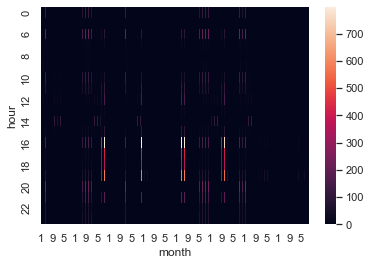

In [152]:
sns.heatmap(table2)
plt.show()

##### __2.Evolution of the total number of items over time__

We are going to extract data with "country" and "created_at"

In [153]:
df2 = df[['country','created_at']]
df2

,country,created_at
0,ch,2016-06-01 11:42:25.111
1,ch,2016-06-01 11:42:26.350
2,ch,2016-06-02 14:01:44.255
3,ch,2016-06-02 14:01:51.499
4,ch,2016-06-02 14:01:53.274
...,...,...
4553,ch,2017-11-27 08:38:54.166
4554,ch,2017-11-27 09:11:26.933
4555,ch,2017-11-27 09:17:50.562
4556,ch,2017-11-27 09:19:58.311


Now we are going to extract 'year' and 'month' as new columns from created_at

In [154]:
df2['month'] = pd.DatetimeIndex(df2['created_at']).month
df2['year'] = pd.DatetimeIndex(df2['created_at']).year

In [155]:
df2

,country,created_at,month,year
0,ch,2016-06-01 11:42:25.111,6,2016
1,ch,2016-06-01 11:42:26.350,6,2016
2,ch,2016-06-02 14:01:44.255,6,2016
3,ch,2016-06-02 14:01:51.499,6,2016
4,ch,2016-06-02 14:01:53.274,6,2016
...,...,...,...,...
4553,ch,2017-11-27 08:38:54.166,11,2017
4554,ch,2017-11-27 09:11:26.933,11,2017
4555,ch,2017-11-27 09:17:50.562,11,2017
4556,ch,2017-11-27 09:19:58.311,11,2017


In [156]:
df2_1 = df2.groupby(["year","month","country"]).count()
df2_1

created_at
year month country            
2016 5     ch               13
     6     ch              185
     7     ch             1332
     8     ch                6
     9     ch             2712
           de               95
           fr                7
           it               76
     11    ch               42
     12    ch               10
2017 1     ch                3
     2     ch                7
     3     ch               10
     4     ch                4
     6     ch                2
     9     ch                4
     10    ch                7
     11    ch               43

In [157]:
df2_1.index

MultiIndex([(2016,  5, 'ch'),
            (2016,  6, 'ch'),
            (2016,  7, 'ch'),
            (2016,  8, 'ch'),
            (2016,  9, 'ch'),
            (2016,  9, 'de'),
            (2016,  9, 'fr'),
            (2016,  9, 'it'),
            (2016, 11, 'ch'),
            (2016, 12, 'ch'),
            (2017,  1, 'ch'),
            (2017,  2, 'ch'),
            (2017,  3, 'ch'),
            (2017,  4, 'ch'),
            (2017,  6, 'ch'),
            (2017,  9, 'ch'),
            (2017, 10, 'ch'),
            (2017, 11, 'ch')],
           names=['year', 'month', 'country'])

Getting data out of MultiIndex from groupby

In [158]:
df2_1.reset_index(inplace=True, level=['year', 'month', 'country'])

In [159]:
df2_1

,year,month,country,created_at
0,2016,5,ch,13
1,2016,6,ch,185
2,2016,7,ch,1332
3,2016,8,ch,6
4,2016,9,ch,2712
5,2016,9,de,95
6,2016,9,fr,7
7,2016,9,it,76
8,2016,11,ch,42
9,2016,12,ch,10


Combining year and month into signle value YYYY-MM

In [160]:
df2_1["yearMonth"] = pd.to_datetime(df2_1.year.astype(str) + '/' + df2_1.month.astype(str)).dt.strftime('%Y-%m')
df2_1["yearMonth"]

0     2016-05
1     2016-06
2     2016-07
3     2016-08
4     2016-09
5     2016-09
6     2016-09
7     2016-09
8     2016-11
9     2016-12
10    2017-01
11    2017-02
12    2017-03
13    2017-04
14    2017-06
15    2017-09
16    2017-10
17    2017-11
Name: yearMonth, dtype: object

In [161]:
df2_1

,year,month,country,created_at,yearMonth
0,2016,5,ch,13,2016-05
1,2016,6,ch,185,2016-06
2,2016,7,ch,1332,2016-07
3,2016,8,ch,6,2016-08
4,2016,9,ch,2712,2016-09
5,2016,9,de,95,2016-09
6,2016,9,fr,7,2016-09
7,2016,9,it,76,2016-09
8,2016,11,ch,42,2016-11
9,2016,12,ch,10,2016-12


In [162]:
df2_1 = df2_1.set_index('yearMonth')

In [163]:
df2_1

,year,month,country,created_at
yearMonth,,,,
2016-05,2016,5,ch,13
2016-06,2016,6,ch,185
2016-07,2016,7,ch,1332
2016-08,2016,8,ch,6
2016-09,2016,9,ch,2712
2016-09,2016,9,de,95
2016-09,2016,9,fr,7
2016-09,2016,9,it,76
2016-11,2016,11,ch,42


In [164]:
df2_1.sort_values(["country"], ascending=False)

,year,month,country,created_at
yearMonth,,,,
2016-09,2016,9,it,76
2016-09,2016,9,fr,7
2016-09,2016,9,de,95
2016-05,2016,5,ch,13
2017-02,2017,2,ch,7
2017-10,2017,10,ch,7
2017-09,2017,9,ch,4
2017-06,2017,6,ch,2
2017-04,2017,4,ch,4


In [165]:
df2_1.drop("year", axis='columns', inplace=True)

In [166]:
df2_1.drop("month", axis='columns', inplace=True)

In [167]:
df2_1

,country,created_at
yearMonth,,
2016-05,ch,13
2016-06,ch,185
2016-07,ch,1332
2016-08,ch,6
2016-09,ch,2712
2016-09,de,95
2016-09,fr,7
2016-09,it,76
2016-11,ch,42


Use pivot table

In [168]:
table_2 = df2_1.pivot_table(values='created_at', index='yearMonth', columns='country', aggfunc=lambda x: len(x.unique()))
table_2

country,ch,de,fr,it
yearMonth,,,,
2016-05,1.0,NaN,NaN,NaN
2016-06,1.0,NaN,NaN,NaN
2016-07,1.0,NaN,NaN,NaN
2016-08,1.0,NaN,NaN,NaN
2016-09,1.0,1.0,1.0,1.0
2016-11,1.0,NaN,NaN,NaN
2016-12,1.0,NaN,NaN,NaN
2017-01,1.0,NaN,NaN,NaN
2017-02,1.0,NaN,NaN,NaN


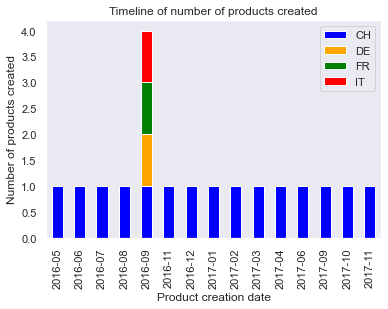

In [169]:
table_2.plot.bar(stacked=True, by="country", title='Timeline of number of products created', color=("blue", "orange","green","red"))
plt.xlabel("Product creation date")
plt.ylabel("Number of products created")
plt.legend(["CH","DE", "FR", "IT", "US"], loc="upper right")
plt.show()

Ploting stacked bar plot

## F. Correlation analysis

##### __Quantifying linear relationships between the energy_per_hundred and other numerical variables__

Our task is to quantify the linear relationship between the energy per_hundred and other numberical variables.
We will use the per_hundred columns and find their corealtions with energy_per_hundred

In [170]:
df.reset_index(inplace=True)

In [171]:
new_columns = ['energy_kcal_per_hundred',
               'energy_per_hundred', 
               
               'calcium_per_hundred', 
               'carbohydrates_per_hundred',
              
               'fat_per_hundred',
               
            'fiber_per_hundred',
            'iron_per_hundred', 'protein_per_hundred', 'sodium_per_hundred',
       'sugars_per_hundred',
       'vitamin_c_ascorbic_acid_per_hundred']
#'fatty_acids_total_saturated_per_hundred', 'cholesterol_per_hundred','vitamin_a_iu_per_hundred','fatty_acids_total_trans_per_hundred', 

In [172]:
df_f1 = df[new_columns]

In [173]:
df_f1["energy_per_hundred"].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0       1010.0
1       1490.0
2       2033.0
3        145.0
4       2300.0
         ...  
4553     170.0
4554    2030.0
4555     305.0
4556    2013.0
4557     756.0
Name: energy_per_hundred, Length: 4558, dtype: float64>

In [174]:
df_f1["energy_per_hundred"].corr(df_f1["calcium_per_hundred"])

0.6673593149779273

In [175]:
df_f1.isnull().sum()

energy_kcal_per_hundred                   9
energy_per_hundred                        0
calcium_per_hundred                    4493
carbohydrates_per_hundred                 0
fat_per_hundred                           0
fiber_per_hundred                         0
iron_per_hundred                       4511
protein_per_hundred                       0
sodium_per_hundred                     4368
sugars_per_hundred                       33
vitamin_c_ascorbic_acid_per_hundred    4466
dtype: int64

In [176]:
for i in new_columns[4:]:
    corr = df_f1["energy_per_hundred"].corr(df_f1[i])
    print("Correlation with %s: %f" %(i,corr))

Correlation with fat_per_hundred: 0.786074
Correlation with fiber_per_hundred: 0.471790
Correlation with iron_per_hundred: 0.562300
Correlation with protein_per_hundred: 0.375030
Correlation with sodium_per_hundred: -0.074725
Correlation with sugars_per_hundred: 0.538621
Correlation with vitamin_c_ascorbic_acid_per_hundred: 0.682485


To conclude, high energy levels are caused by fats,carbohydrates, sugars;
low energy score by
cholesterol and vitamin_c for example are not correlated.

##### __2.Linear or non_linear relationship__

Our task is to revel the true nature of relationship, linear or non-linear

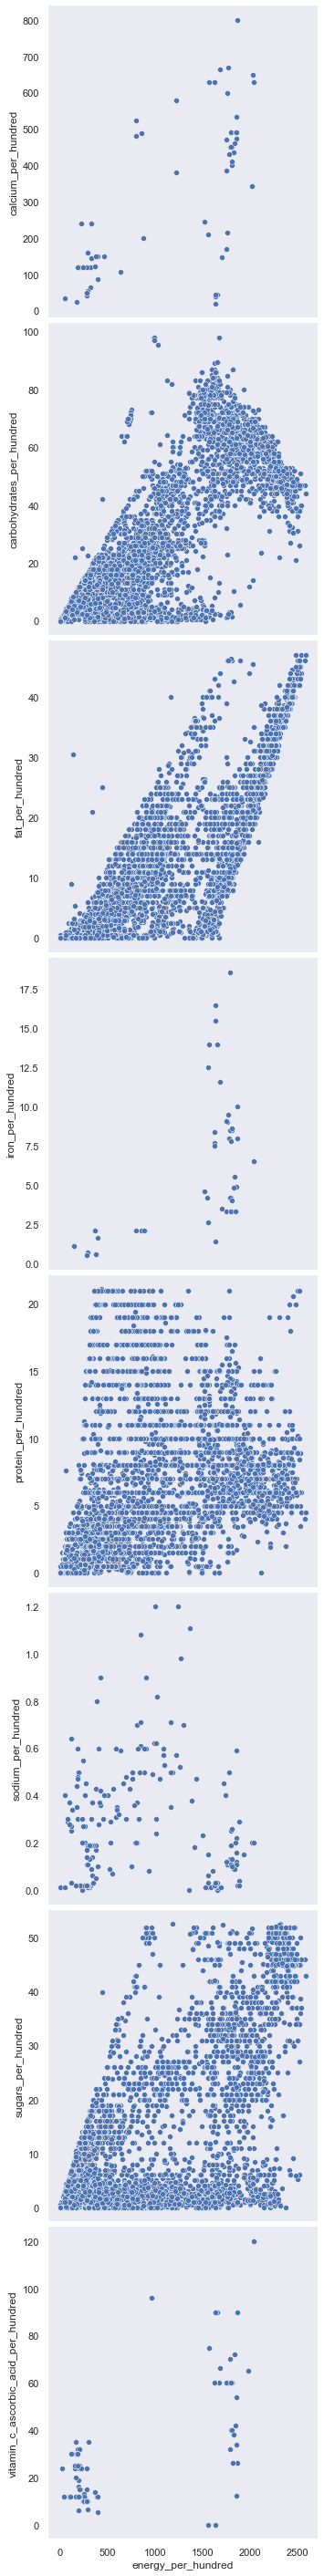

In [177]:
sns.pairplot(df_f1, height=5,
            x_vars=['energy_per_hundred'],
            y_vars= ['calcium_per_hundred', 
                     'carbohydrates_per_hundred',
                     'fat_per_hundred',
                     'iron_per_hundred',
                     'protein_per_hundred', 
                     'sodium_per_hundred', 'sugars_per_hundred',
                     'vitamin_c_ascorbic_acid_per_hundred',])
#'cholesterol_per_hundred','fatty_acids_total_saturated_per_hundred',
plt.show()

In [178]:
#correlation between two columns in absolute values 
for i in new_columns[4:]:
    corr = df_f1["energy_per_hundred"].corr(df_f1[i])
    corr = abs(corr)
    print("Correlation with %s: %f" %(i,corr))

Correlation with fat_per_hundred: 0.786074
Correlation with fiber_per_hundred: 0.471790
Correlation with iron_per_hundred: 0.562300
Correlation with protein_per_hundred: 0.375030
Correlation with sodium_per_hundred: 0.074725
Correlation with sugars_per_hundred: 0.538621
Correlation with vitamin_c_ascorbic_acid_per_hundred: 0.682485


Creating a scatterplot with absolute values between energy per hundred and 3 other variables that have biggest correlation

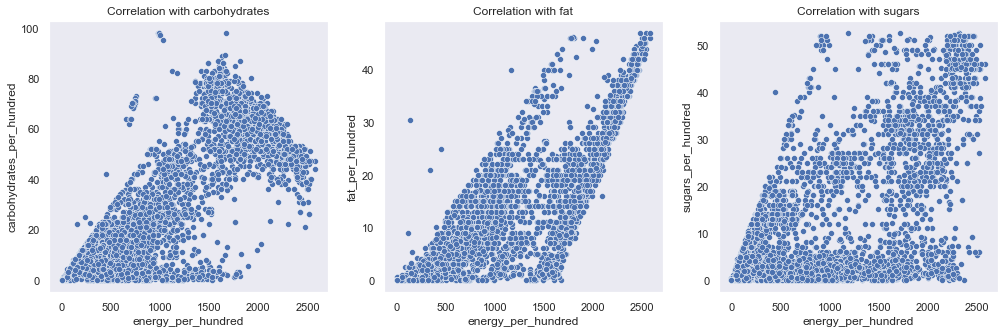

In [179]:
#defining plotting region
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))
sns.set_theme(style="dark")
#creating boxplot in each subplot
sns.scatterplot(data=df_f1, x="energy_per_hundred", y="carbohydrates_per_hundred", ax=axes[0], palette="light:m_r").set(title='Correlation with carbohydrates')
sns.scatterplot(data=df_f1, x='energy_per_hundred', y="fat_per_hundred", ax=axes[1], palette="light:m_r").set(title='Correlation with fat')
sns.scatterplot(data=df_f1, x='energy_per_hundred', y="sugars_per_hundred", ax=axes[2], palette="light:m_r").set(title='Correlation with sugars')
plt.show()

There is a very good potential here for this to be a linear relationship with the variables that are listed.

Creating a scatterplot that has smallest correlation with energy_per_hundred column 

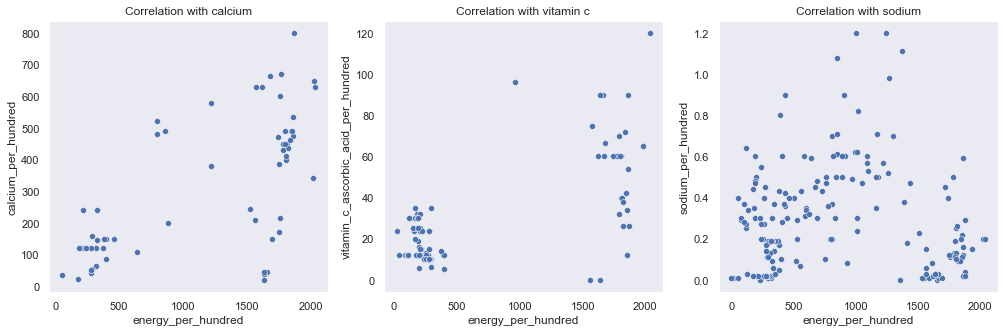

In [180]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))
sns.set_theme(style="dark")
#creating boxplot in each subplot
sns.scatterplot(data=df_f1, x='energy_per_hundred', y="calcium_per_hundred", ax=axes[0], palette="light:m_r").set(title='Correlation with calcium')
sns.scatterplot(data=df_f1, x='energy_per_hundred', y="sodium_per_hundred", ax=axes[2], palette="light:m_r").set(title='Correlation with sodium')
sns.scatterplot(data=df_f1, x='energy_per_hundred', y="vitamin_c_ascorbic_acid_per_hundred", ax=axes[1], palette="light:m_r").set(title='Correlation with vitamin c')
plt.show()

There is no linear relationship with this variables.

##### __3.Testing the independaence of two categorical variables statistically__

We are going to test the independence of two categorical variables statistically.
For that we are going to use chi2 test.
We will use the "energy_per_hundred" column to create new variables containing categories low enery, medium energy and high energy.

In [181]:
df = df.dropna(subset=["energy_per_hundred"]).reset_index(drop=True)

In [182]:
df.sort_values(by='energy_per_hundred', ascending=False, inplace=True)

In [183]:
df["energy_per_hundred"].describe()

count    4558.000000
mean     1013.402852
std       704.481831
min         0.000000
25%       383.250000
50%       884.000000
75%      1571.750000
max      2581.000000
Name: energy_per_hundred, dtype: float64

In [184]:
df['energy'] = df['energy_per_hundred'].apply(lambda x:  'low' if 0 < x < 500 else 'high' if 1500 <= x < 3569 else 'mid')

In [185]:
df[["energy","energy_per_hundred", "country"]]

,energy,energy_per_hundred,country
4052,high,2581.0,ch
1767,high,2580.0,ch
2163,high,2540.0,ch
3928,high,2540.0,ch
1705,high,2530.0,ch
...,...,...,...
4328,mid,0.0,ch
3154,mid,0.0,ch
3153,mid,0.0,ch
418,mid,0.0,ch


In [186]:
country = df["country"]
energy= df["energy"]

In this case we will be testing energy per hundred with countries to see how are the levels of energy in the products associated with the country where the product is produced. 
With this test minimum expected count should be at least one and there shouldn't be too many cells.

To get a quick look from the counts of both of these we can use pandas crosstable and simply enter those two fields.
Now to perform the test i'd like to make use of chi2 contingency
which is from the stats module.
Let's load that in and then i can simply feed that that cross table and i'm going to actually store 
all the results separately so i have the chi value the p value degrees of freedom and 
expectation expected values so that i get all of those as a result.


In [187]:
crosstable = pd.crosstab(country, energy)
crosstable

energy,high,low,mid
country,,,
ch,1275,1396,1709
de,33,31,31
fr,4,1,2
it,35,22,19


In [188]:
from scipy.stats import chi2_contingency

In [189]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(crosstable, correction=False) 
c, p, dof, expected

(15.749751079802268,
 0.01516207902777121,
 6,
 array([[1294.3966652 , 1393.37428697, 1692.22904783],
        [  28.07481351,   30.22158842,   36.70359807],
        [   2.06867047,    2.22685388,    2.70447565],
        [  22.45985081,   24.17727073,   29.36287846]]))

The first value is the chi-square value of 76.05. The chance of such a value or even more extreme, in a sample, if there is no association is 3.034161966756285e-13 (the second value). This is known as the p-value or significance. It is considered 'significant' usually if this value is below 0.05, which in this case it is. This indicates then an association between the two variables (one has an impact on the other).

The third value is the degrees of freedom, which is an indication of the size of the table.

The last array are the so called expected values. These are the counts to be expected if the two variables had no influence on each other.


There is a criteria that the lowest expected value should be at least 1, and not too many should be below 5. Often a threshold of 20% is used (so if more than 20% of the cells have an expected count of 5 or less, the test is not reliable to use).

So lets check this. First the lowest expected count:

In [190]:
expected.min()

2.0686704695041684

So 2.07 is above the criteria of at least 1, so thats good.

Now for the percentage of cells with a count less than 5:

In [191]:
len(expected[expected < 5]) / len(expected) * 100

75.0

This criteria is not good. 